# Dimensionality reduction with TSNE for Google's hair dryer seed. Testing different metrics

In [1]:
#TODO: remove after development 
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

pd.set_option('display.max_columns', 5400)

from fiz_lernmodule import data_reader
from fiz_lernmodule.visualization_landscaping import EmbeddingVisualizer

## Loading data

In [4]:
seed_name = 'hair_dryer'
src_dir = "."

landscape_reader = data_reader.LandscapeDataReader(src_dir=src_dir)
patents = landscape_reader.load_data(seed_name=seed_name)

Loading data from .\data\hair_dryer\landscape_data.pkl
Finished loading.


In [5]:
print(patents.shape)
#patents.head()

(9695, 12)


In [6]:
final_layer = pd.read_csv(src_dir + '/data/' + seed_name + '/final_layer_embedding.csv')
final_layer.set_index("Unnamed: 0", inplace=True)

print(final_layer.shape)
#final_layer.head()

(9695, 64)


In [7]:
average_word = pd.read_csv(src_dir + '/data/' + seed_name + '/average_word_embedding.csv')
average_word.set_index("Unnamed: 0", inplace=True)

print(average_word.shape)
#average_word.head()

(9695, 300)


## Preprocessing of text from abstract to labels with TF-IDF

In [8]:
patents_seed = patents.loc[patents['ExpansionLevel'] == 'Seed']
patents_seed["abstract_prep"] = patents_seed["title_text"].str.cat(patents_seed["abstract_text"], sep=" ")
print(patents_seed.shape)
patents_seed.head()

(235, 13)


C:\Users\tskripnikova\Anaconda3\envs\vis_emb\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pub_num publication_number country_code family_id  priority_date  \
19   6269549      US-6269549-B1           US  26813015       19990108   
21   6377749      US-6377749-B2           US  18545893       20000127   
40   5701681       US-5701681-A           US   7762607       19950523   
90   5243682       US-5243682-A           US  22970098       19881011   
106  5448677       US-5448677-A           US   6433590       19910609   

                                            title_text  \
19                              Device for drying hair   
21                   Hairdryer with concentric nozzles   
40                                Hand-held hair dryer   
90          Hair dryer with an isolated heater element   
106  Electric hair dryer with clogged filter indicator   

                                         abstract_text  \
19   A hair dryer in accord with the invention incl...   
21   The present invention is a hairdryer. The hair...   
40   The invention is directed to a hand-held hair ...   
90   A wall mounted hair dryer, having a stationary...   
106  A hair dryer has a housing including an air in...   

                                                  refs  \
19   US-4744154-A,US-3594916-A,US-3724092-A,US-3981...   
21   JP-S58143604-A,US-3088854-A,US-2001025430-A1,U...   
40   EP-0463315-A2,US-4197448-A,US-4903416-A,DE-390...   
90   US-4738196-A,US-4683370-A,US-4629864-A,US-3955...   
106  JP-S5971785-A,US-5111692-A,US-4311995-A,US-381...   

                                cpcs                 ipcs  \
19               A45D20/14,A45D20/22  A45D20/14,A45D20/22   
21                        A45D20/122            A45D20/12   
40                         A45D20/12            A45D20/12   
90                         A45D20/16            A45D20/16   
106  A45D20/10,A45D2200/15,A45D20/12            A45D20/10   

              assignees_harmonized ExpansionLevel  \
19                          CONAIR           Seed   
21   MATSUSHITA ELECTRIC WORKS LTD           Seed   
40                        BRAUN AG           Seed   
90                  TONJON COMPANY           Seed   
106                       BRAUN AG           Seed   

                                         abstract_prep  
19   Device for drying hair A hair dryer in accord ...  
21   Hairdryer with concentric nozzles The present ...  
40   Hand-held hair dryer The invention is directed...  
90   Hair dryer with an isolated heater element A w...  
106  Electric hair dryer with clogged filter indica...

In [9]:
from fiz_lernmodule.preprocessing import PreProcessor

pre = PreProcessor()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tskripnikova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
patents_seed['terms'] = patents_seed['abstract_text'].map(lambda patent: pre.preprocess_text(patent).split())
print(patents_seed.shape)
#patents_seed.head()

(235, 14)


C:\Users\tskripnikova\Anaconda3\envs\vis_emb\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
import gensim

dictionary = gensim.corpora.Dictionary(patents_seed['terms'] )
#dictionary.token2id

C:\Users\tskripnikova\Anaconda3\envs\vis_emb\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Document to Bag-of-word

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in patents_seed['terms'] ]

# Preview Bag Of Words for a sample document
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} \"{}\" appears {} times.".format(bow_doc_0[i][0], dictionary[bow_doc_0[i][0]], bow_doc_0[i][1]))

Word 0 "accord" appears 1 times.
Word 1 "adjust" appears 1 times.
Word 2 "air" appears 1 times.
Word 3 "airflow" appears 1 times.
Word 4 "amount" appears 1 times.
Word 5 "asymmetr" appears 1 times.
Word 6 "base" appears 2 times.
Word 7 "carri" appears 1 times.
Word 8 "close" appears 1 times.
Word 9 "compact" appears 1 times.
Word 10 "conduit" appears 1 times.
Word 11 "deliv" appears 1 times.
Word 12 "devic" appears 2 times.
Word 13 "dryer" appears 1 times.
Word 14 "fan" appears 1 times.
Word 15 "form" appears 1 times.
Word 16 "hair" appears 1 times.
Word 17 "head" appears 1 times.
Word 18 "hood" appears 3 times.
Word 19 "includ" appears 1 times.
Word 20 "moreov" appears 1 times.
Word 21 "place" appears 1 times.
Word 22 "regul" appears 1 times.
Word 23 "secur" appears 1 times.
Word 24 "stagger" appears 1 times.
Word 25 "storag" appears 1 times.
Word 26 "therebetween" appears 1 times.
Word 27 "two" appears 1 times.
Word 28 "vent" appears 1 times.


### creating TfidfModel

In [13]:
from pprint import pprint

tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

for doc in corpus_tfidf:
    #pprint(doc)
    break

In [14]:
from operator import itemgetter

for i, doc in enumerate(corpus_tfidf):
    doc.sort(key=itemgetter(1), reverse=True)
    sorted_words = []
    for word_id, relevance in doc:
        sorted_words.append(dictionary[word_id])
        #print(dictionary[word_id] + " " + str(word_id) + " " + str(relevance)) 
    patents_seed.iat[i, 12] = sorted_words # replace label with a sorted list
    
#patents_seed.head()

In [15]:
final_layer_seed = final_layer.merge(patents_seed, left_index=True, right_index=True)
final_layer_seed = final_layer_seed.loc[final_layer_seed['ExpansionLevel'] == 'Seed']
final_layer_seed.drop(final_layer_seed.columns[64:], axis=1, inplace=True)
#print(final_layer_seed.shape)
#final_layer_seed.head()

In [16]:
average_word_seed = average_word.merge(patents_seed, left_index=True, right_index=True)
average_word_seed = average_word_seed.loc[average_word_seed['ExpansionLevel'] == 'Seed']
average_word_seed.drop(average_word_seed.columns[300:], axis=1, inplace=True)
#print(average_word_seed.shape)
#average_word_seed.head()

## Trying out TSNE with different parameters

Supported distance metrics:

In [17]:
import sklearn.neighbors

metrics = sorted(sklearn.neighbors.VALID_METRICS['brute'])

In [18]:
#metrics that require additional parameters
metrics.remove('precomputed')
metrics.remove('mahalanobis')
metrics.remove('seuclidean')
metrics.remove('wminkowski')
metrics.remove('yule')

#metrics that always result in an unhelpful visual
metrics.remove('dice')
metrics.remove('hamming')
metrics.remove('jaccard')
metrics.remove('kulsinski')
metrics.remove('matching')
metrics.remove('rogerstanimoto')
metrics.remove('russellrao')
metrics.remove('sokalmichener')
metrics.remove('sokalsneath')

#cosine is twice in the list, remove one
metrics.remove('cosine')

metrics

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'euclidean',
 'l1',
 'l2',
 'manhattan',
 'minkowski',
 'sqeuclidean']

### Final layer embeddings

Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='braycurtis', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)
EmbeddingVisualizer initialized
Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='canberra', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)
EmbeddingVisualizer initialized
Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='chebyshev', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)
EmbeddingVisualizer initialized
Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='cityblock', min_

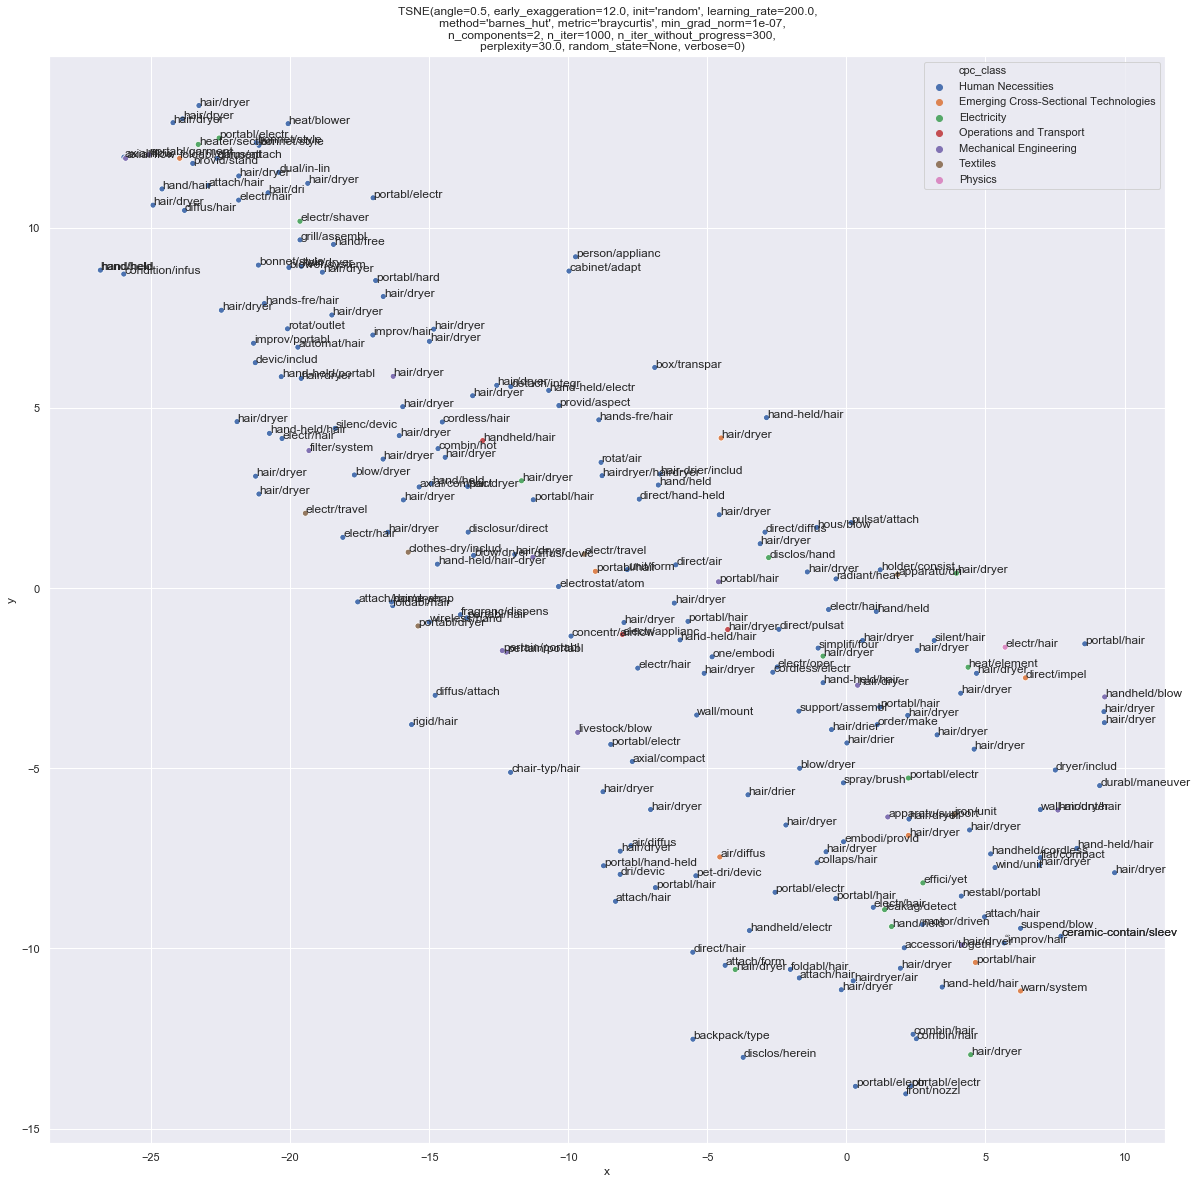

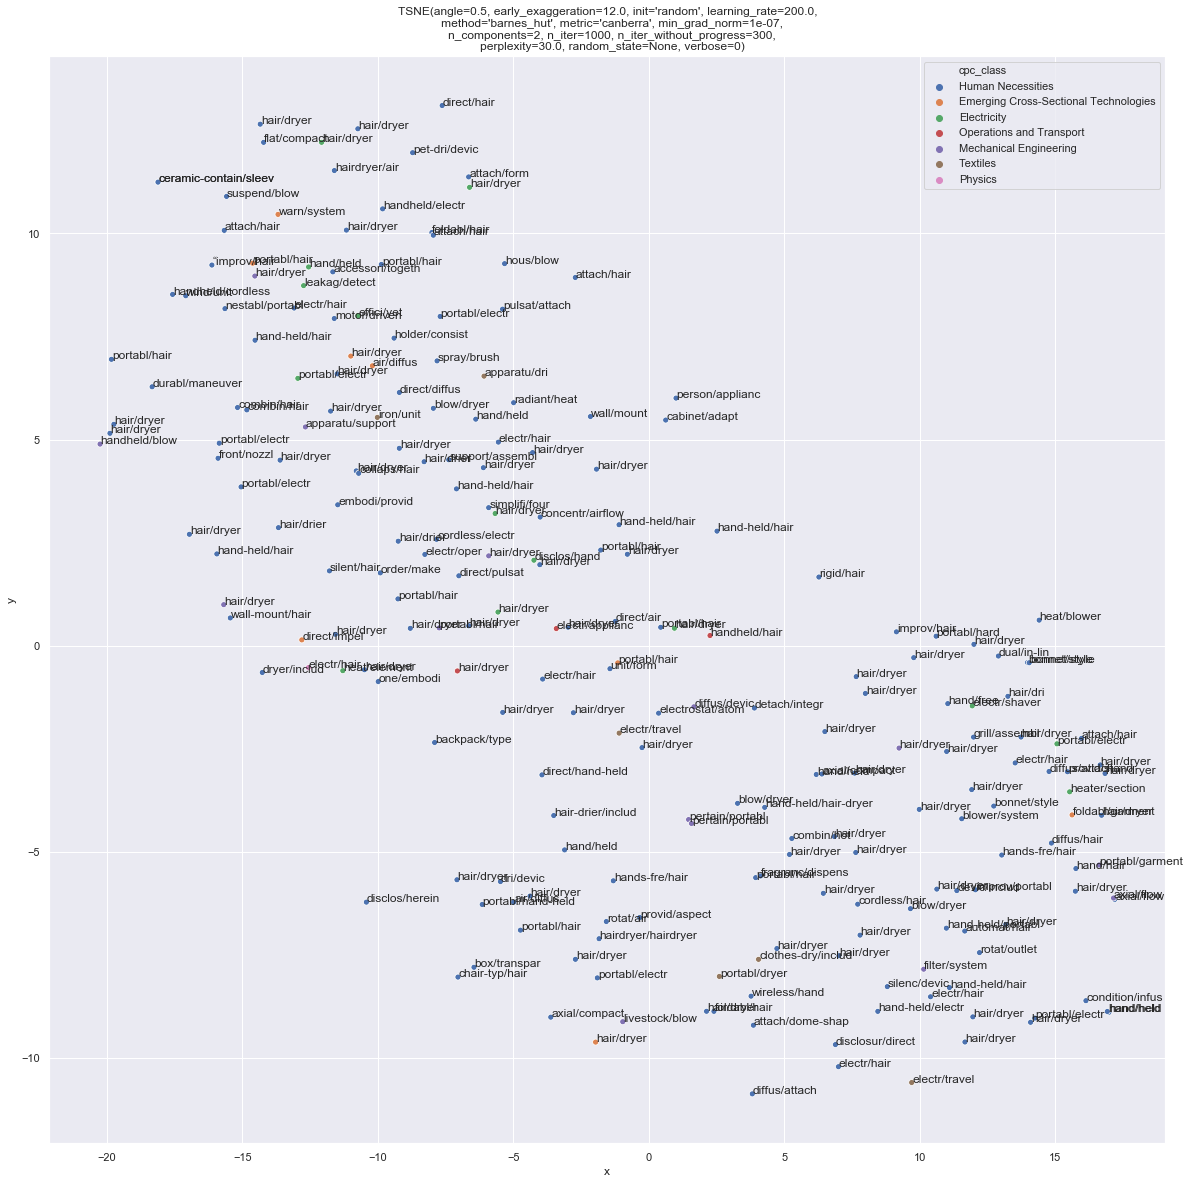

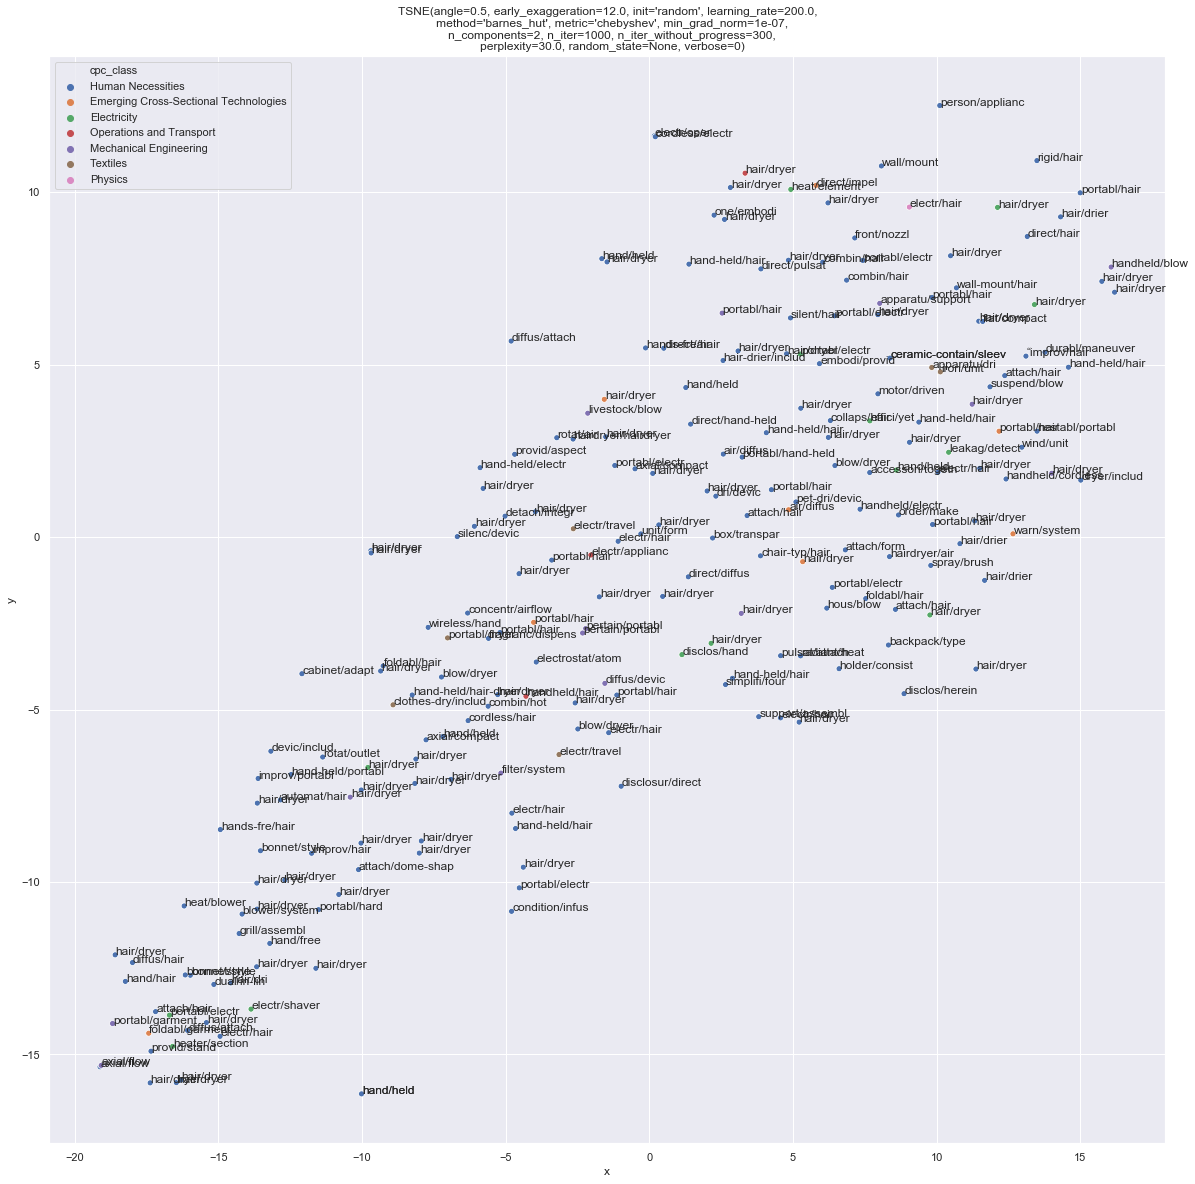

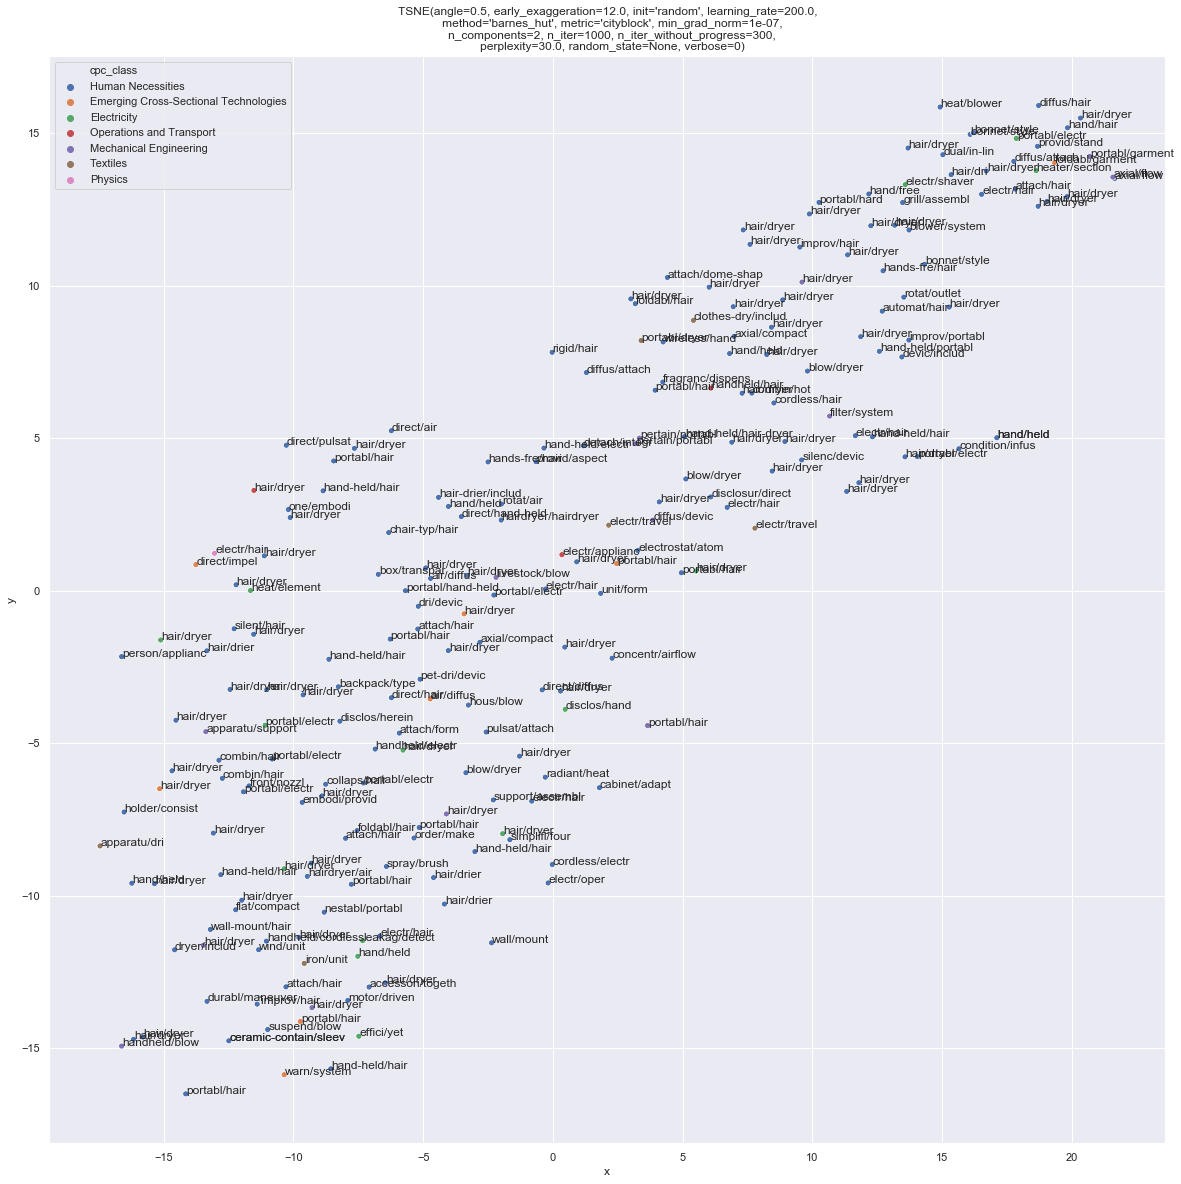

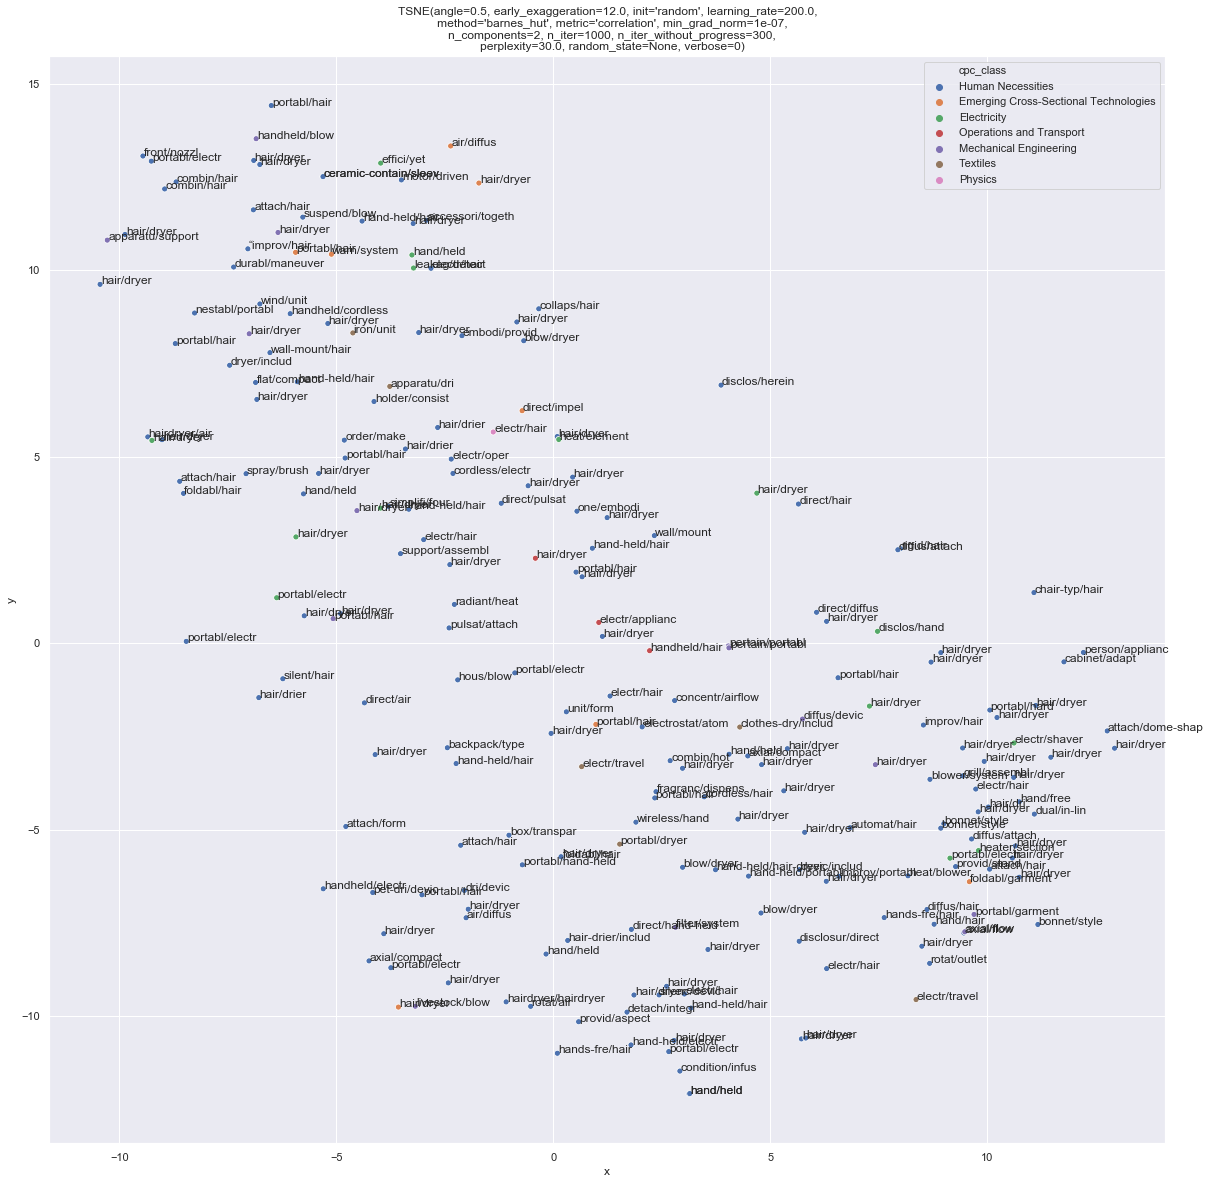

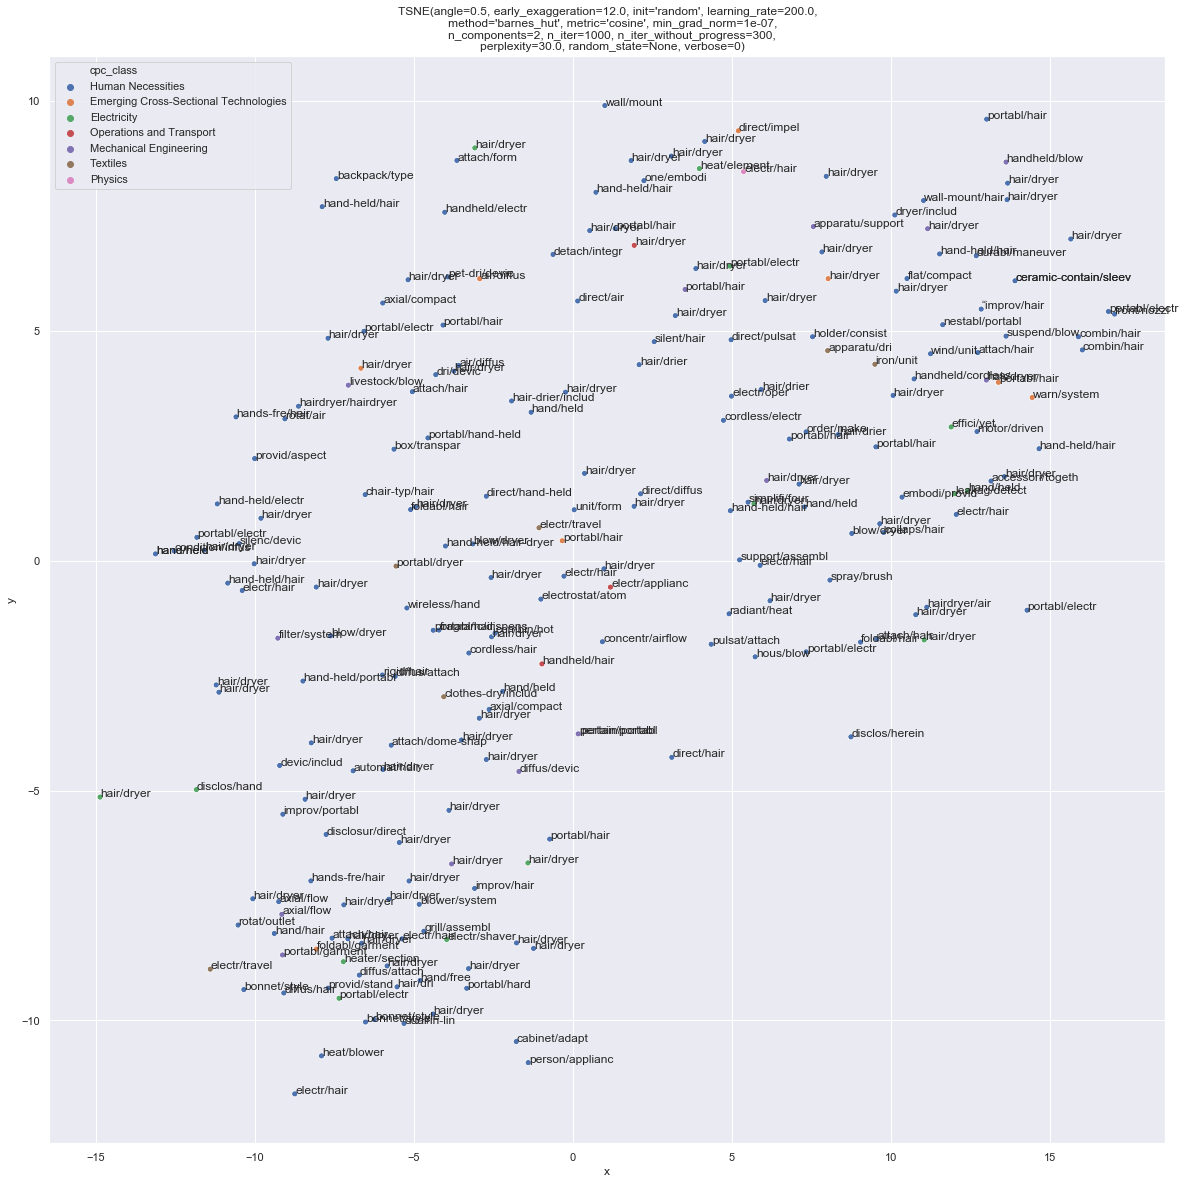

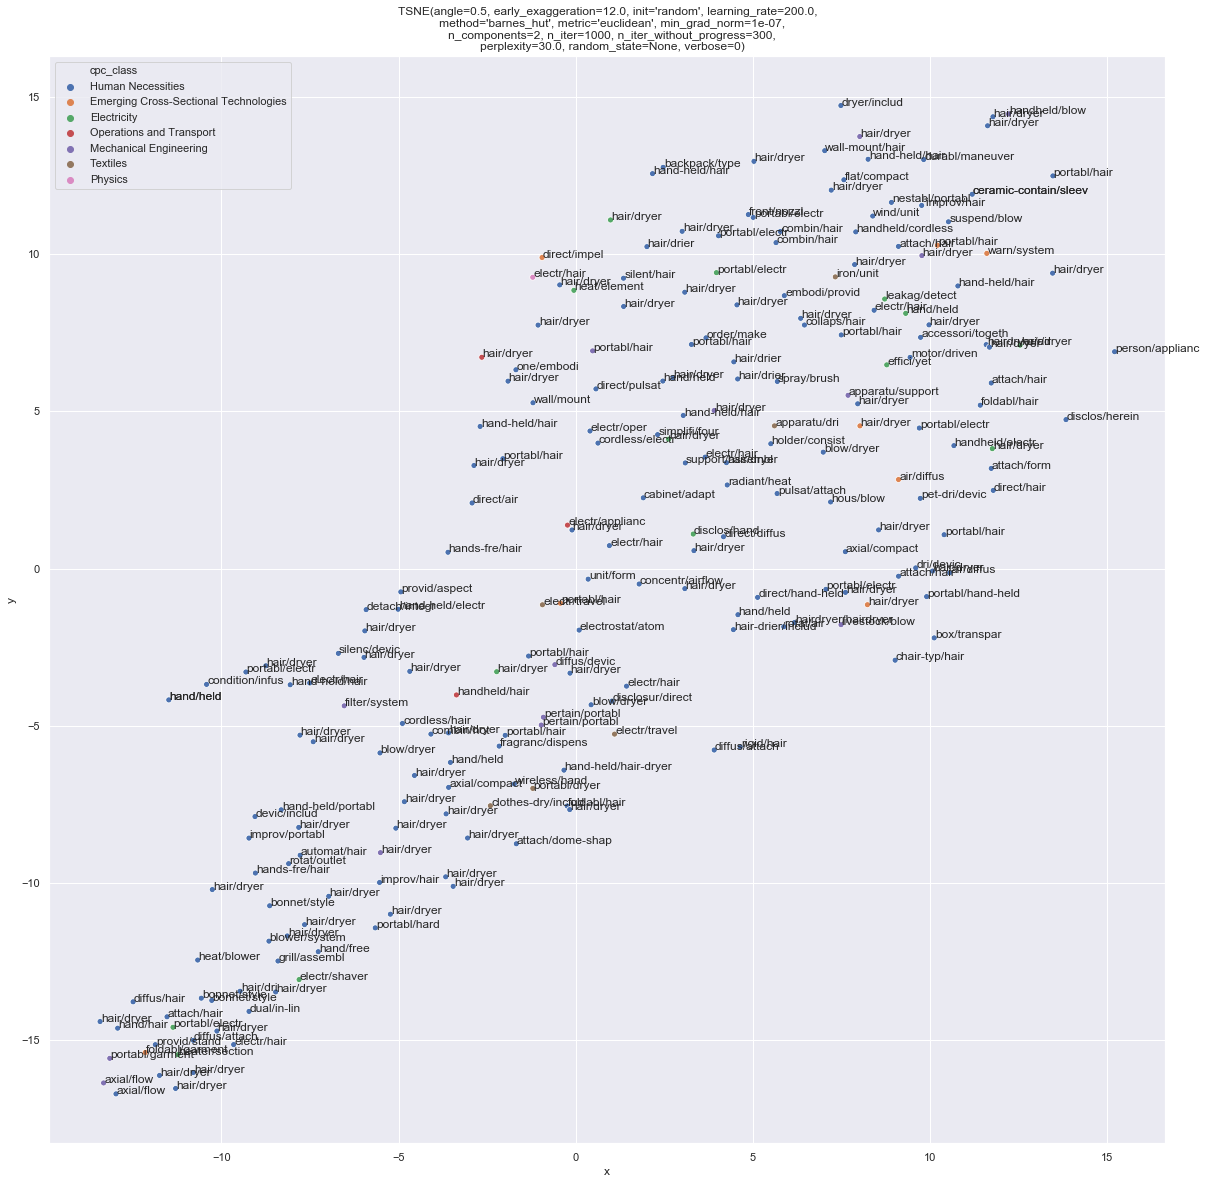

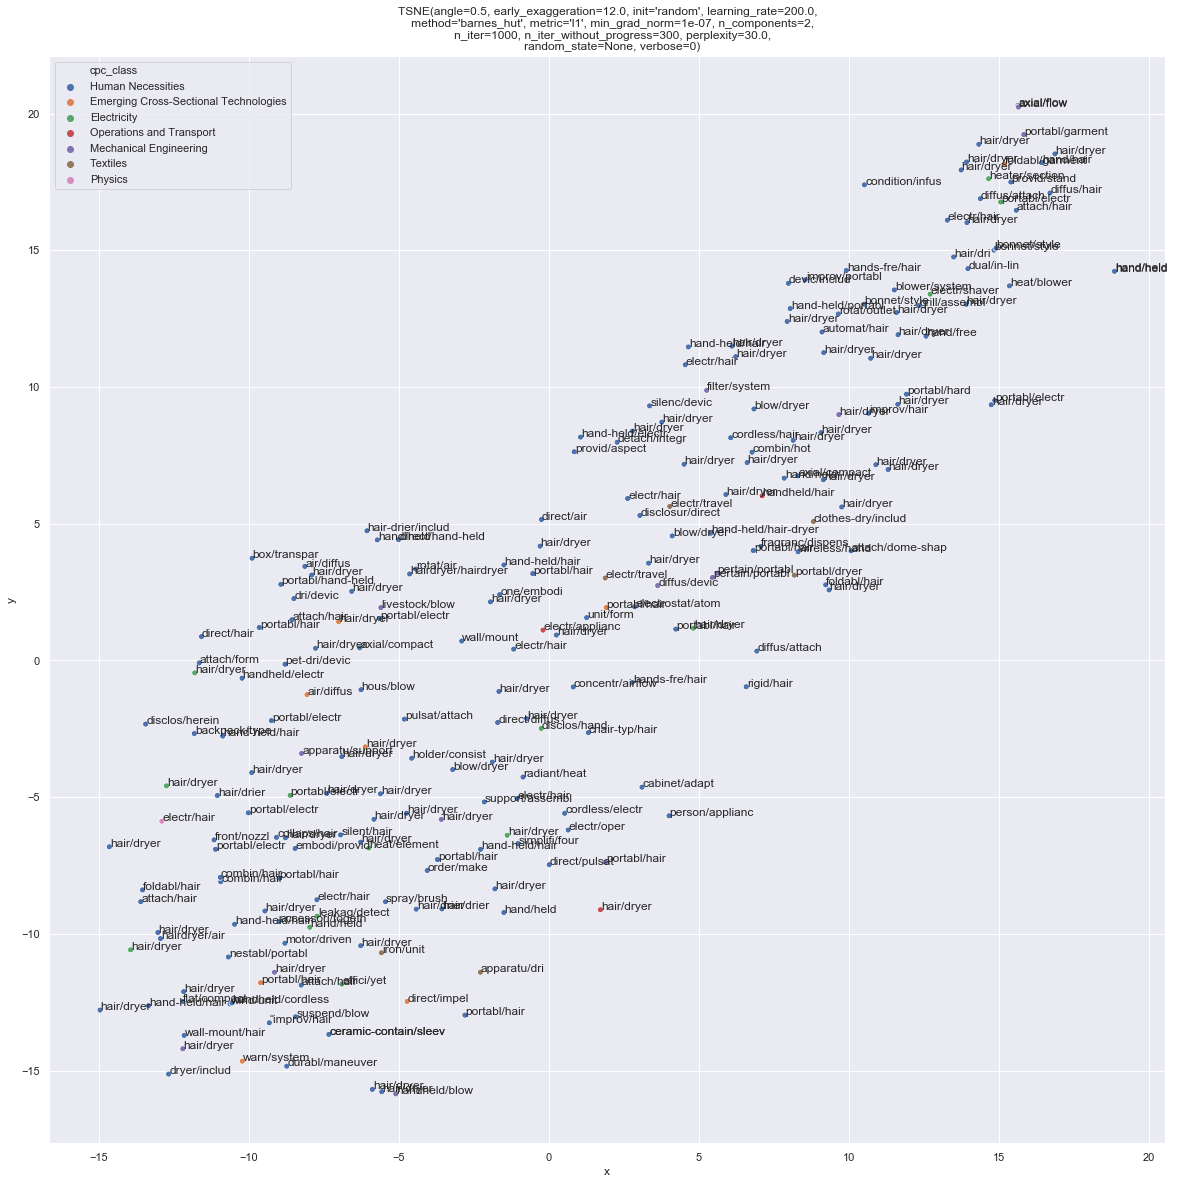

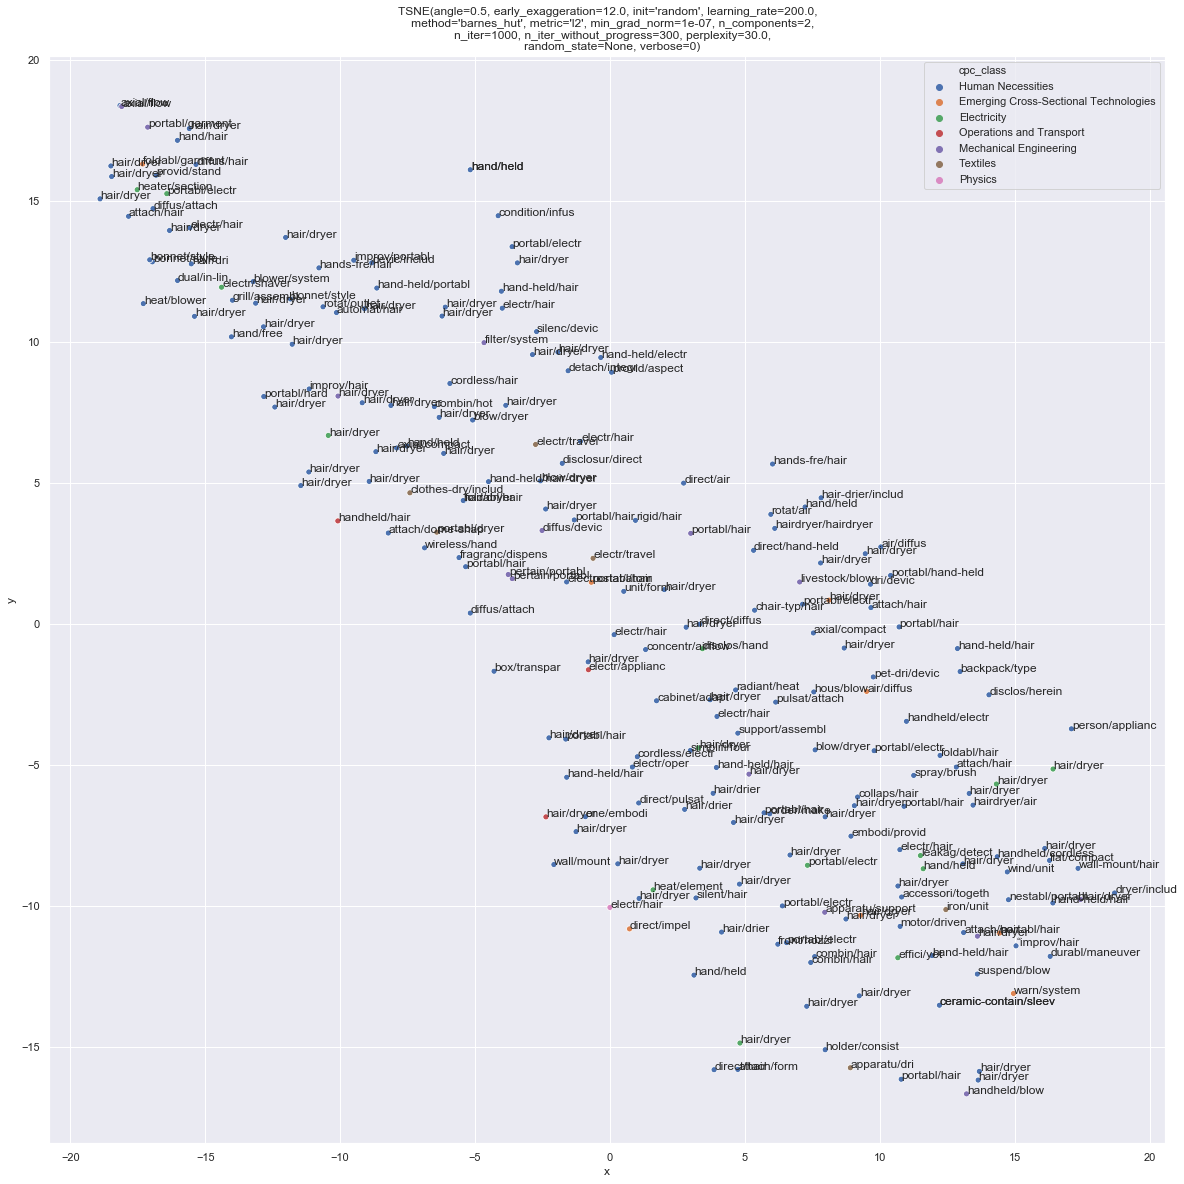

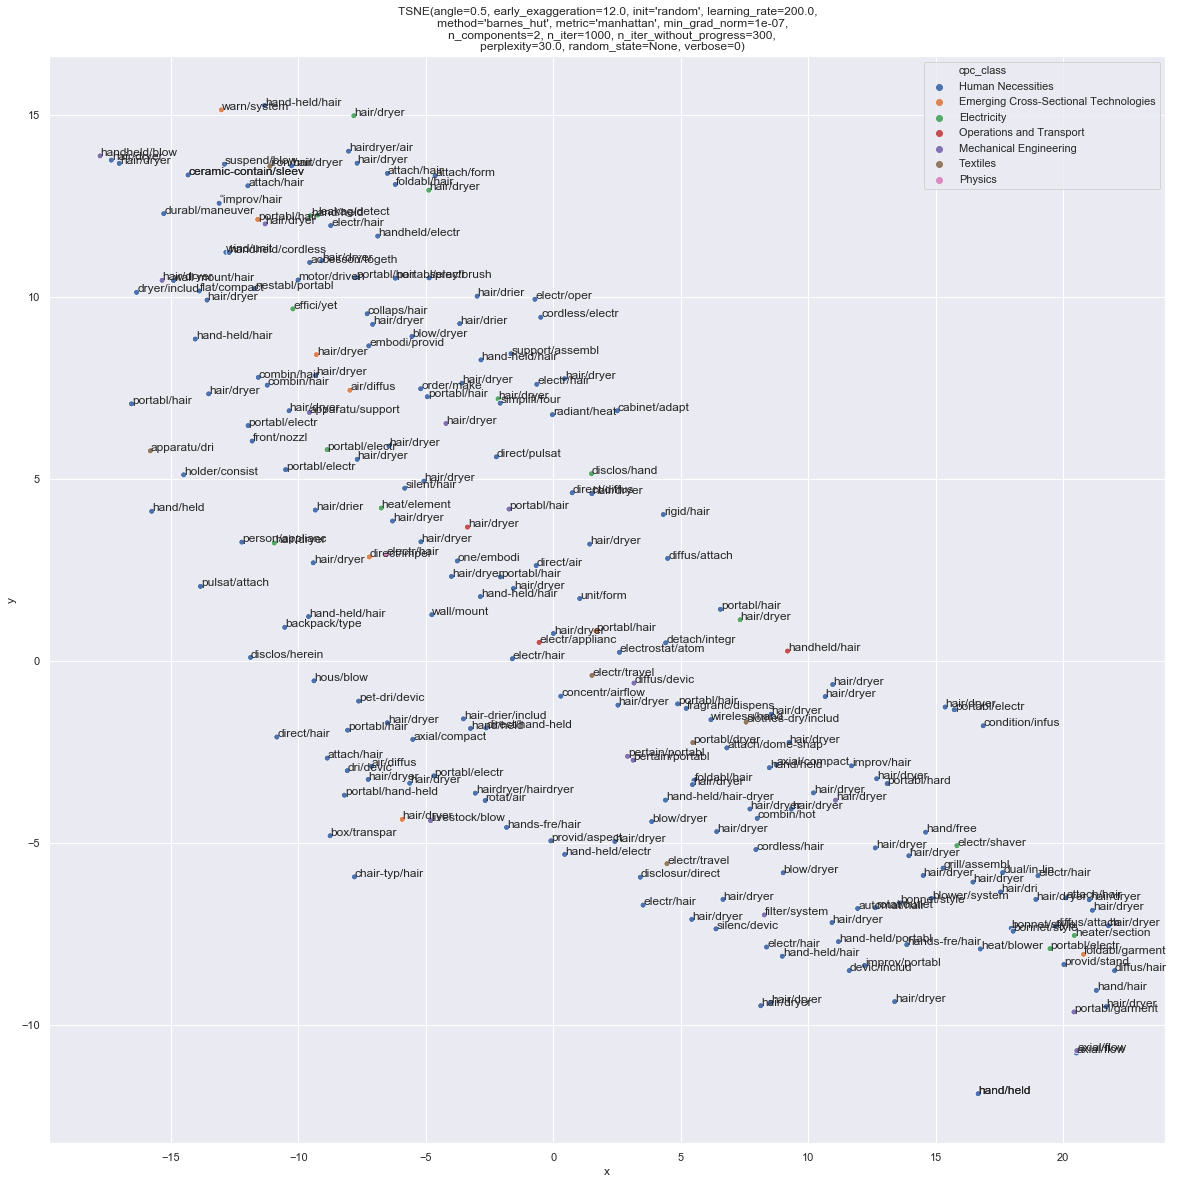

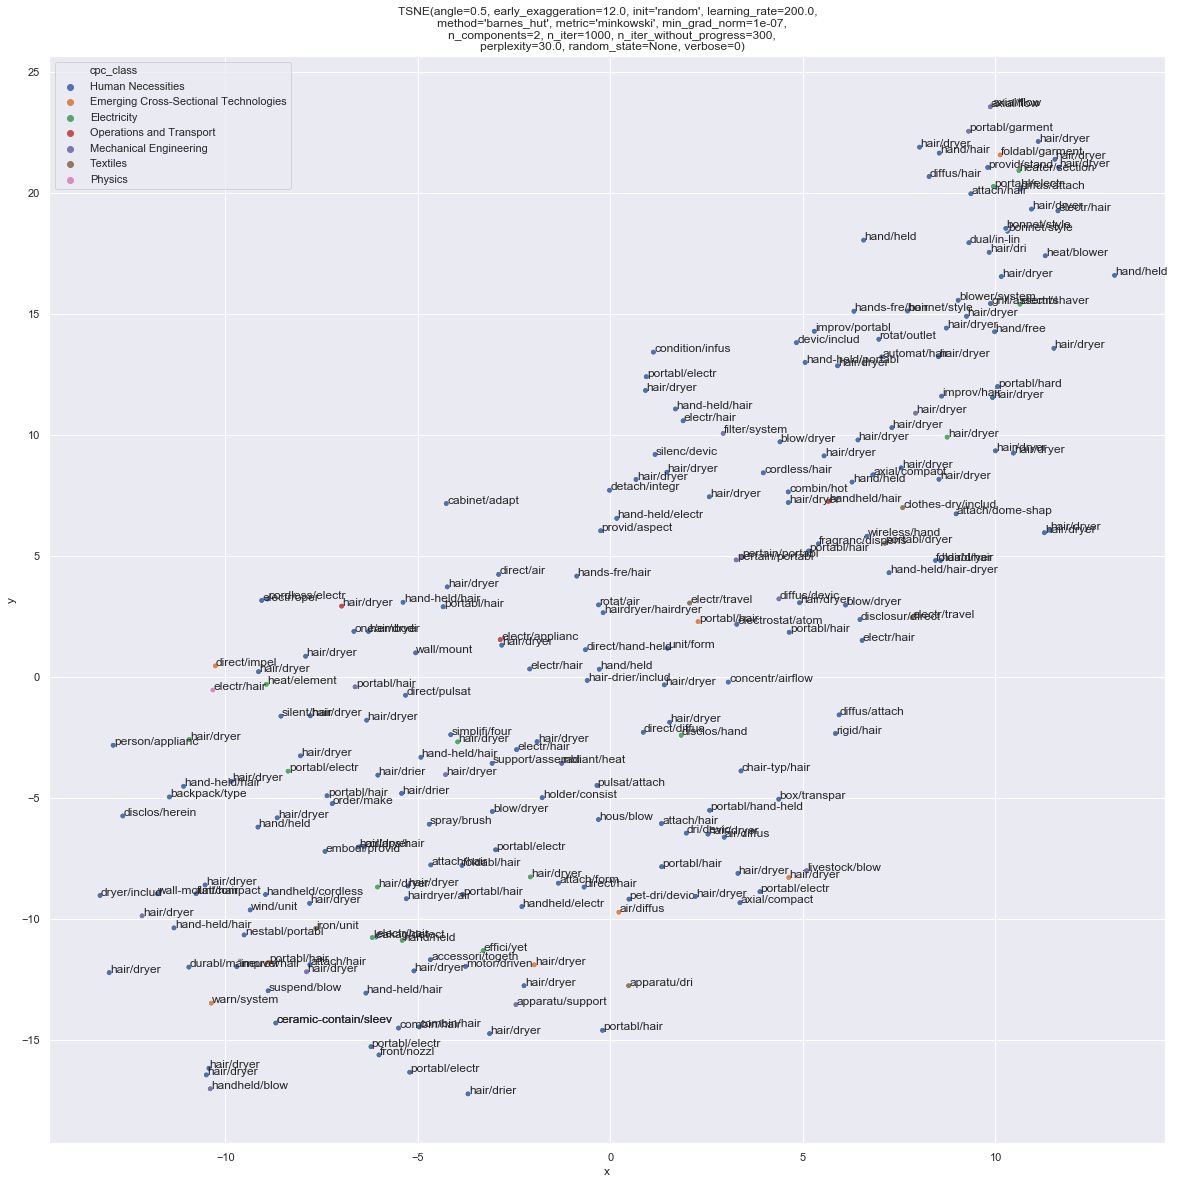

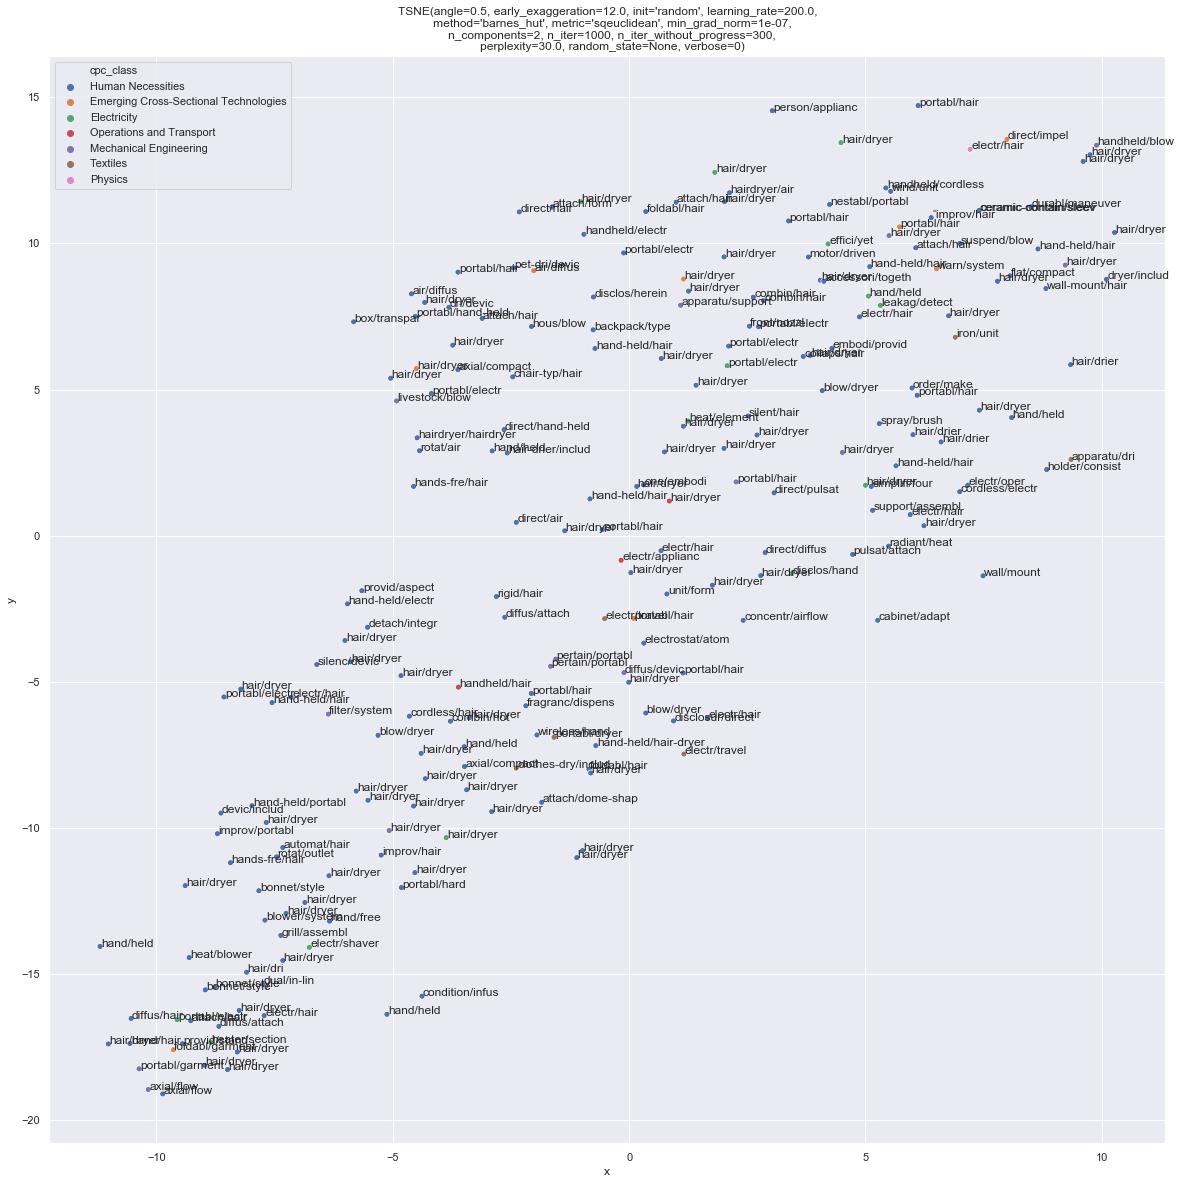

In [19]:
from sklearn.manifold import TSNE

for m in metrics:
    tsne = TSNE(metric=m)
    ev64 = EmbeddingVisualizer(tsne, final_layer_seed, patents_seed)
    ev64.plot_embeddings(detailed=True, density=1, terms=2)

### Averaged word embeddings

Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='braycurtis', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)
EmbeddingVisualizer initialized
Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='canberra', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)
EmbeddingVisualizer initialized
Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='chebyshev', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)
EmbeddingVisualizer initialized
Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='cityblock', min_

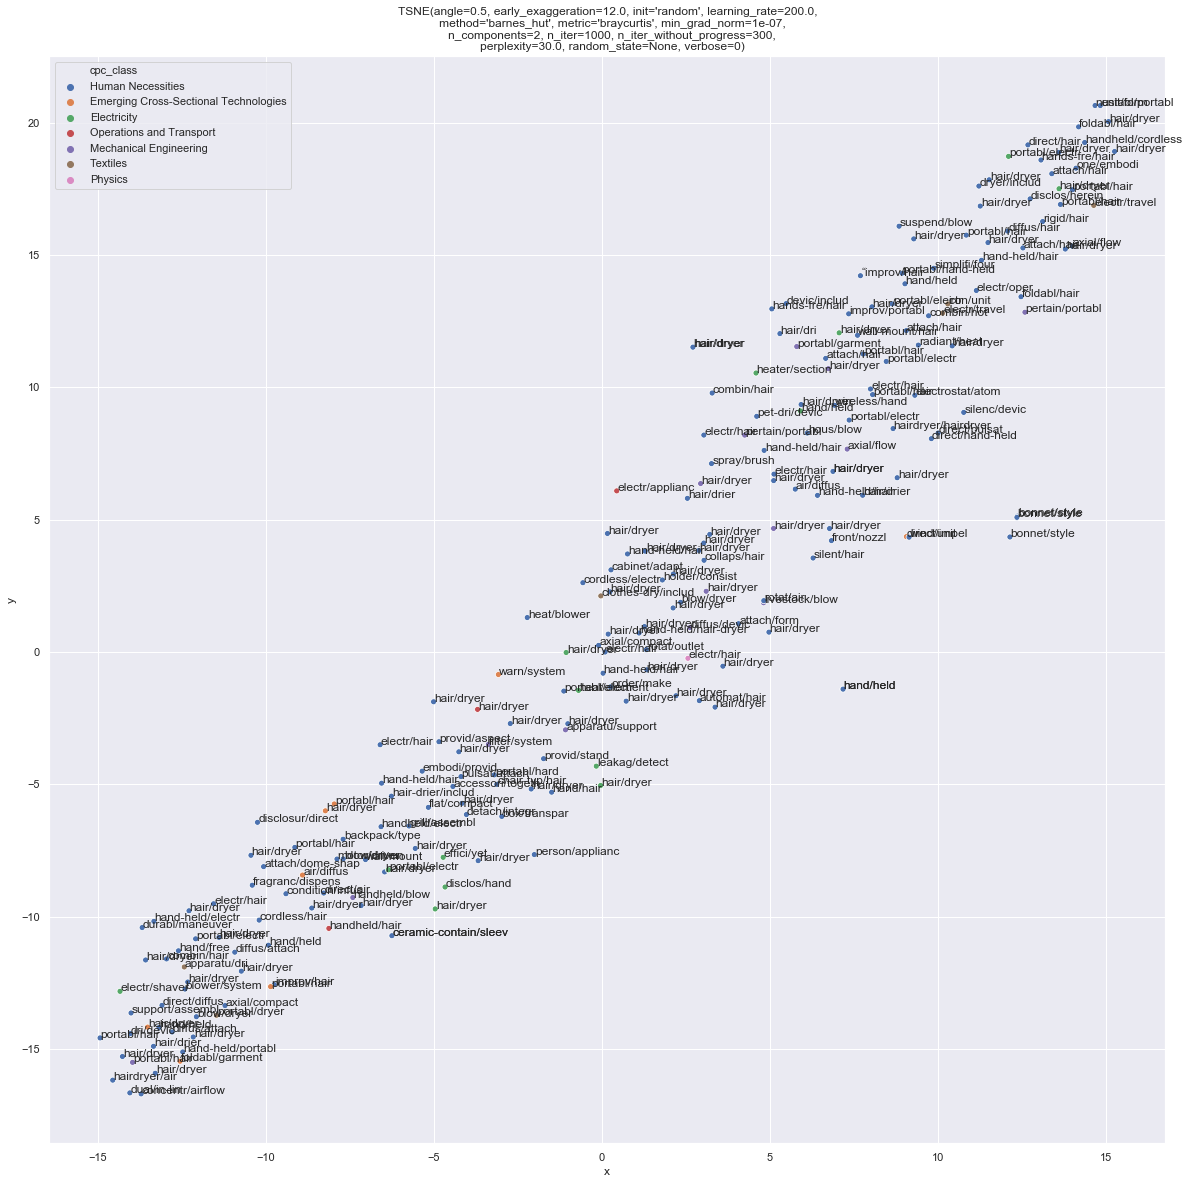

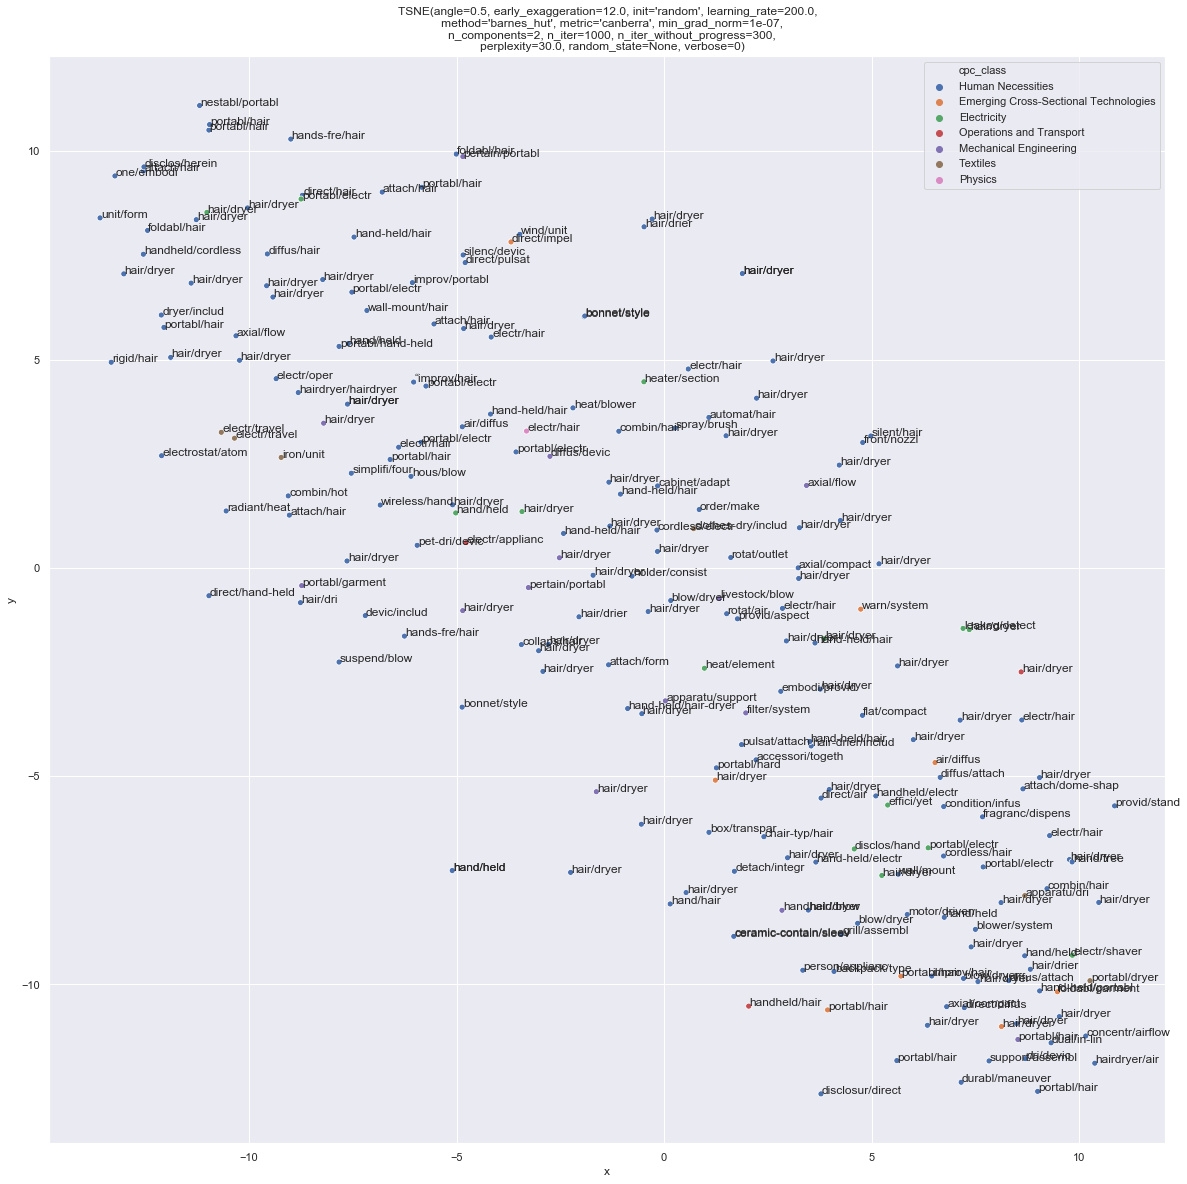

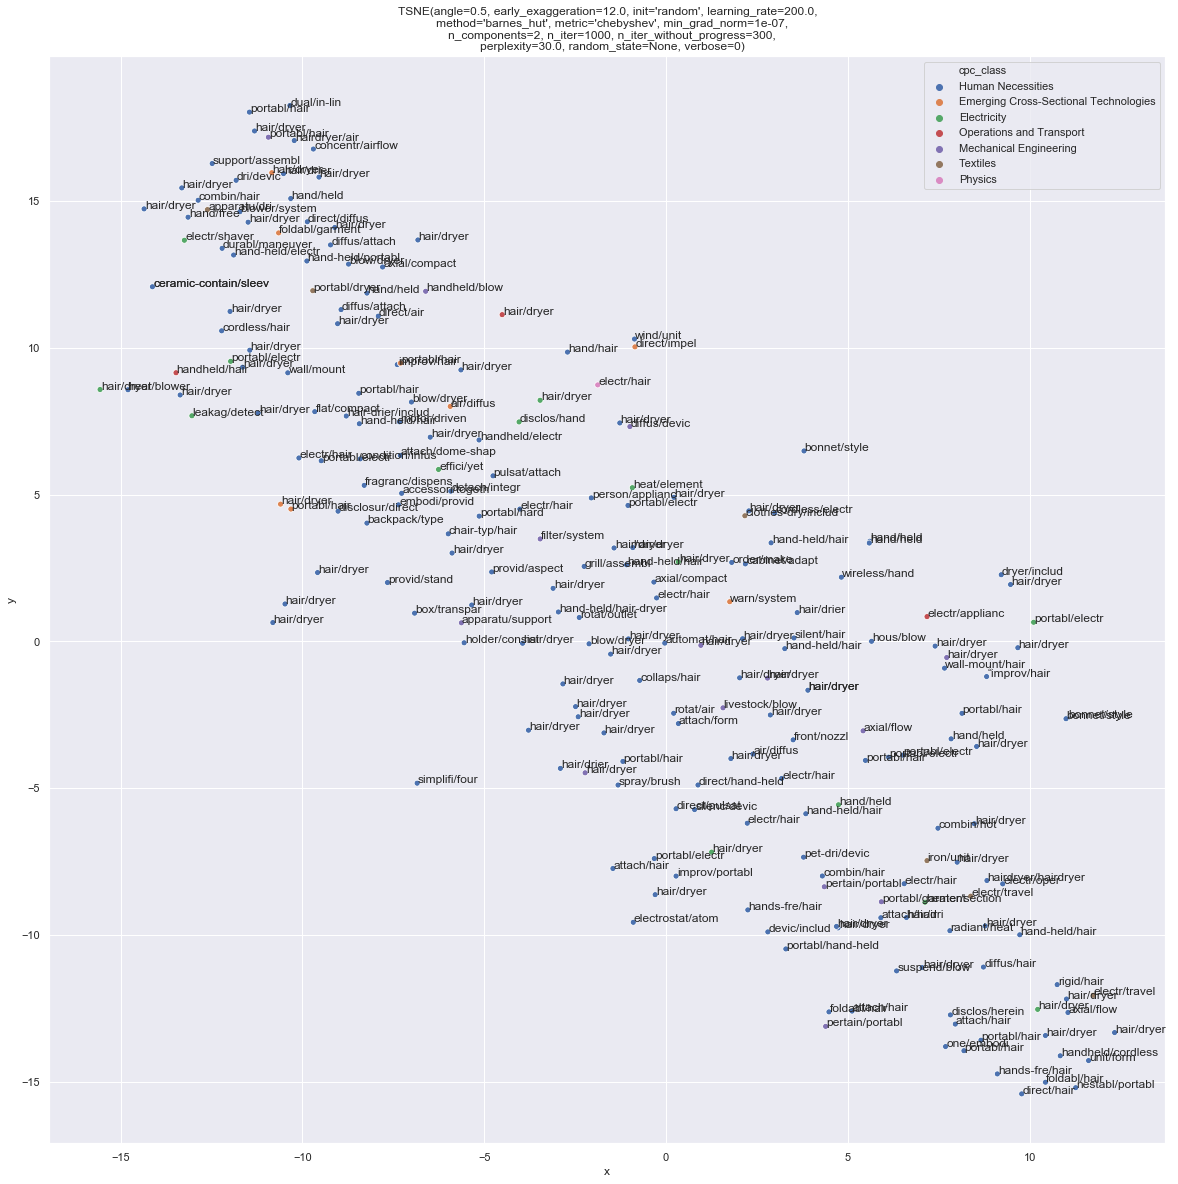

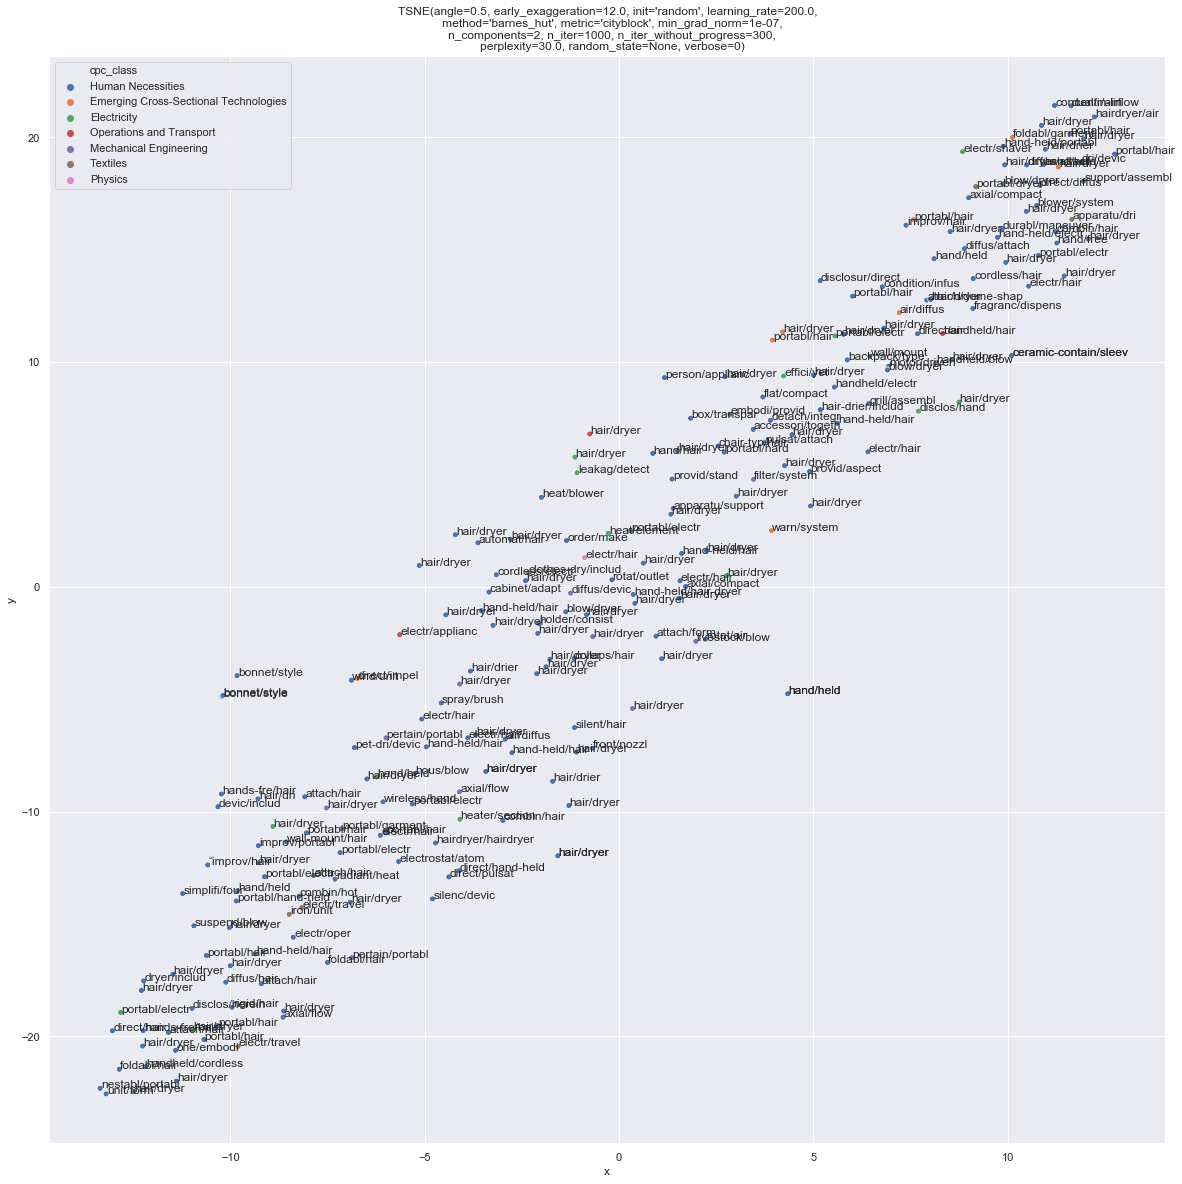

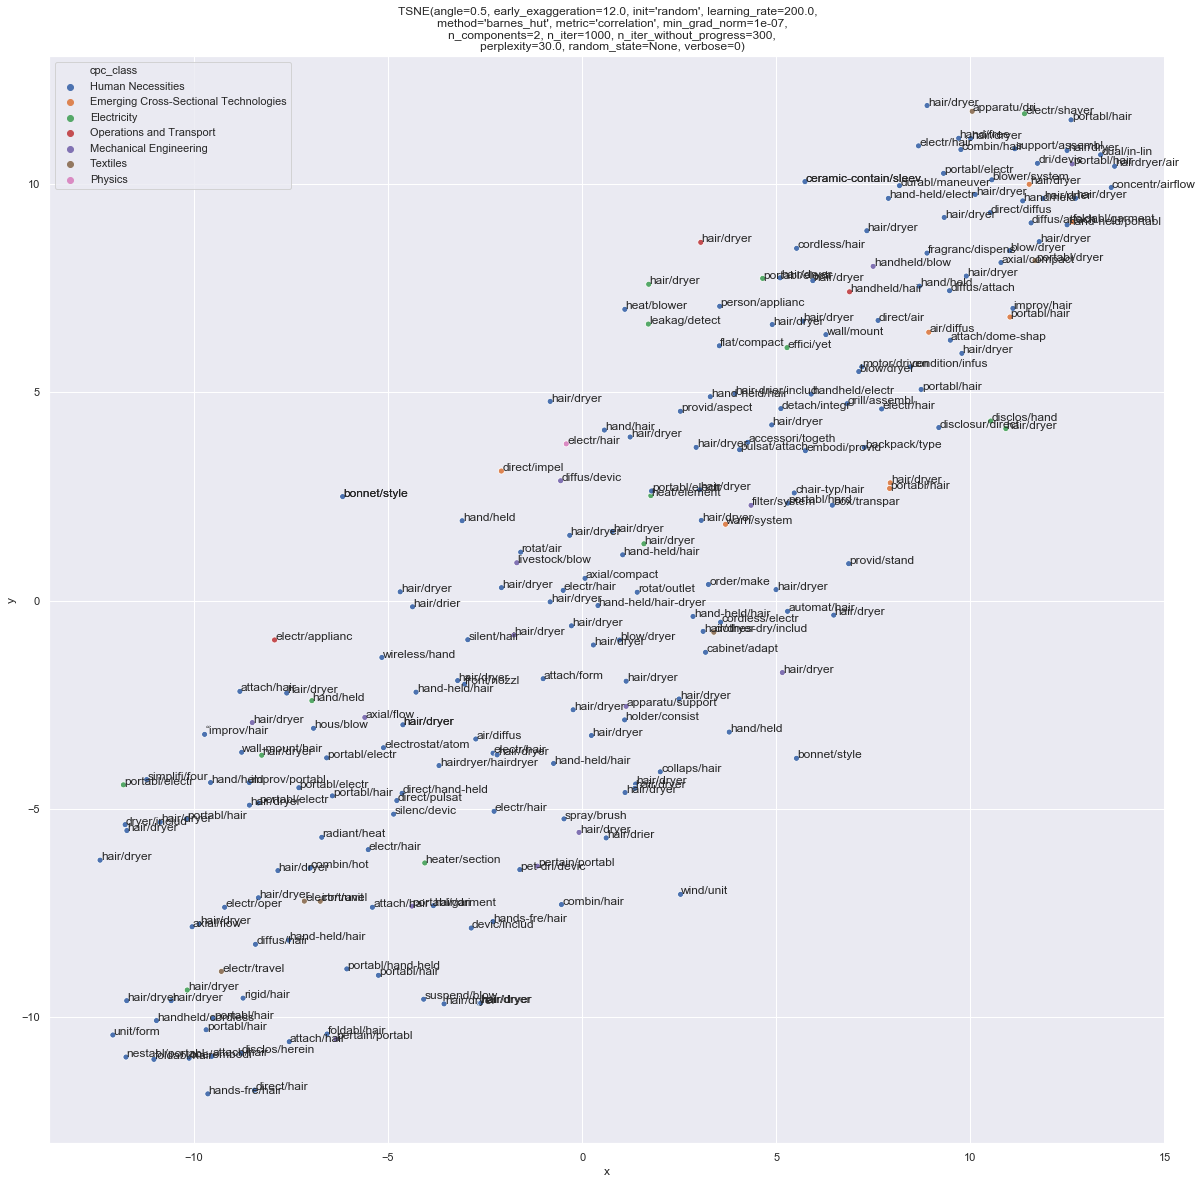

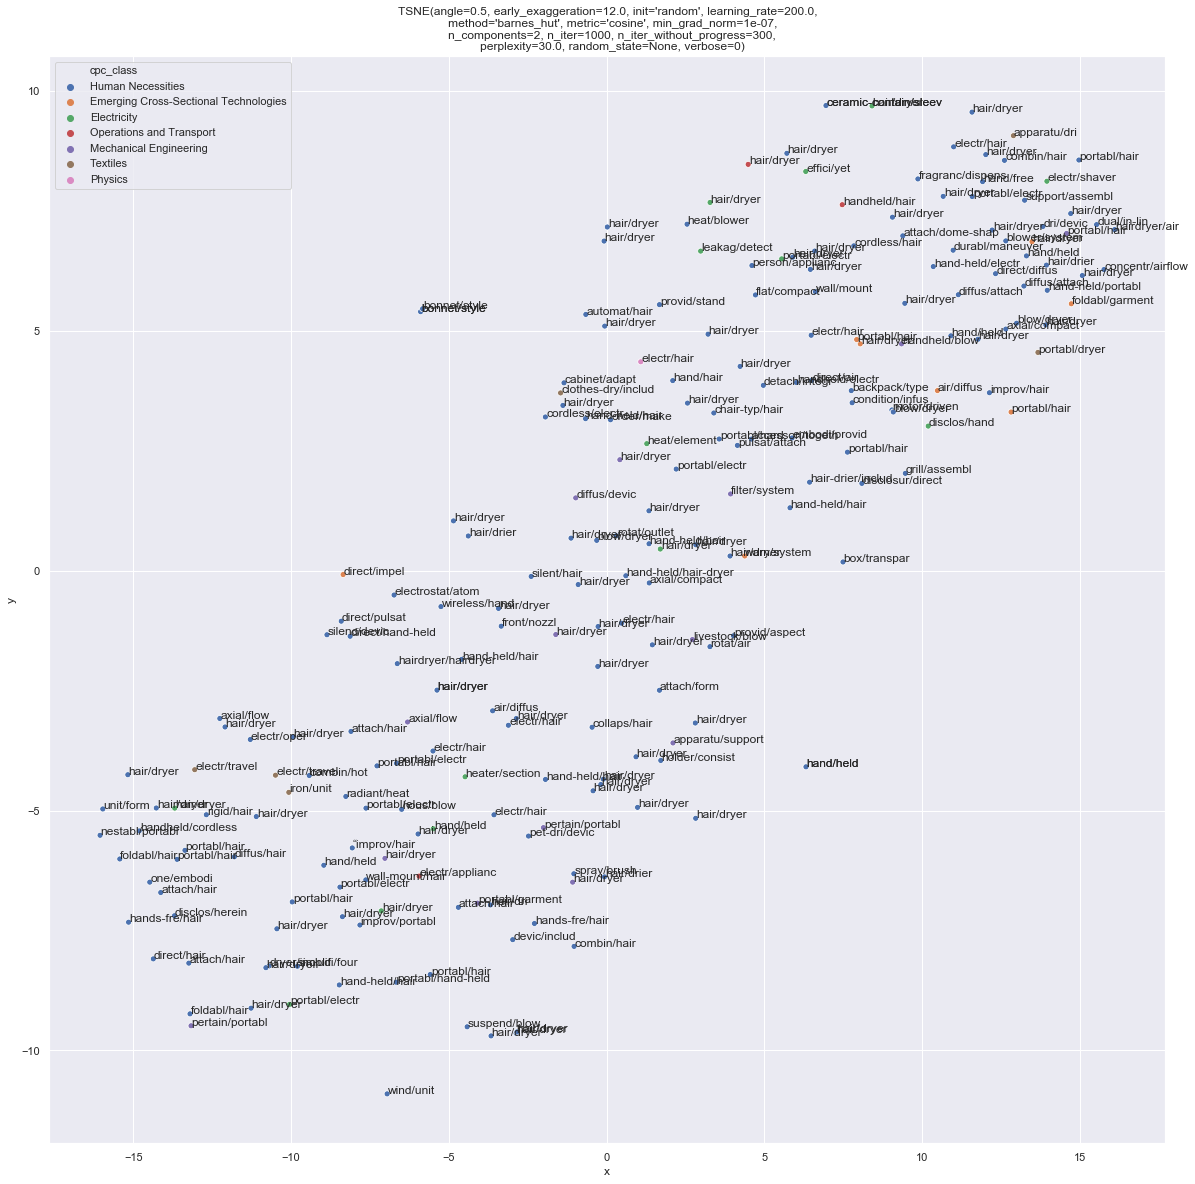

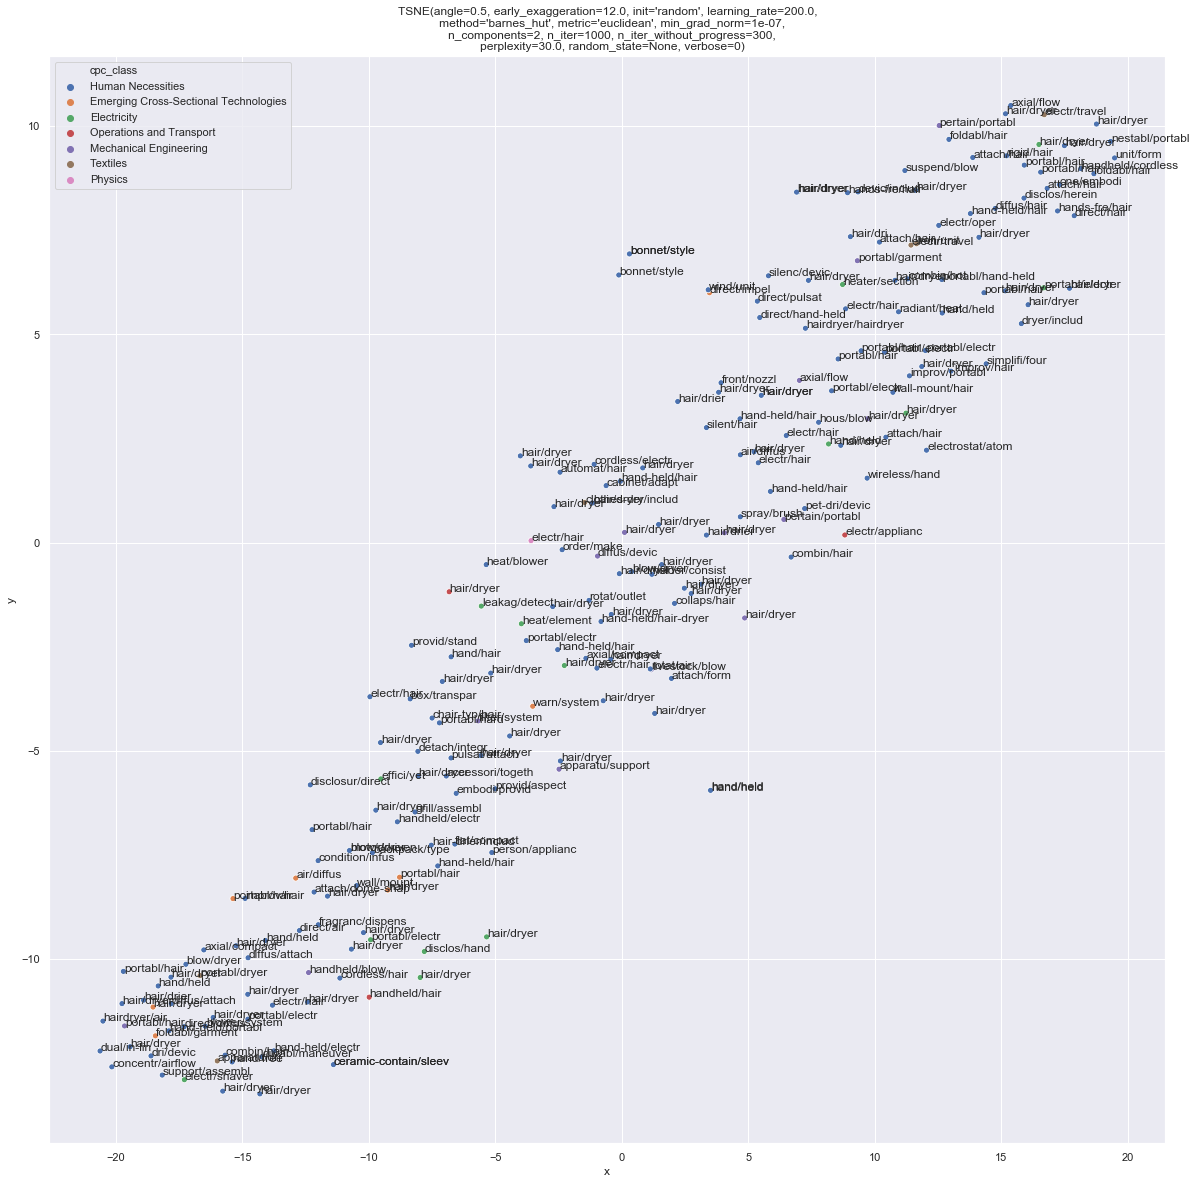

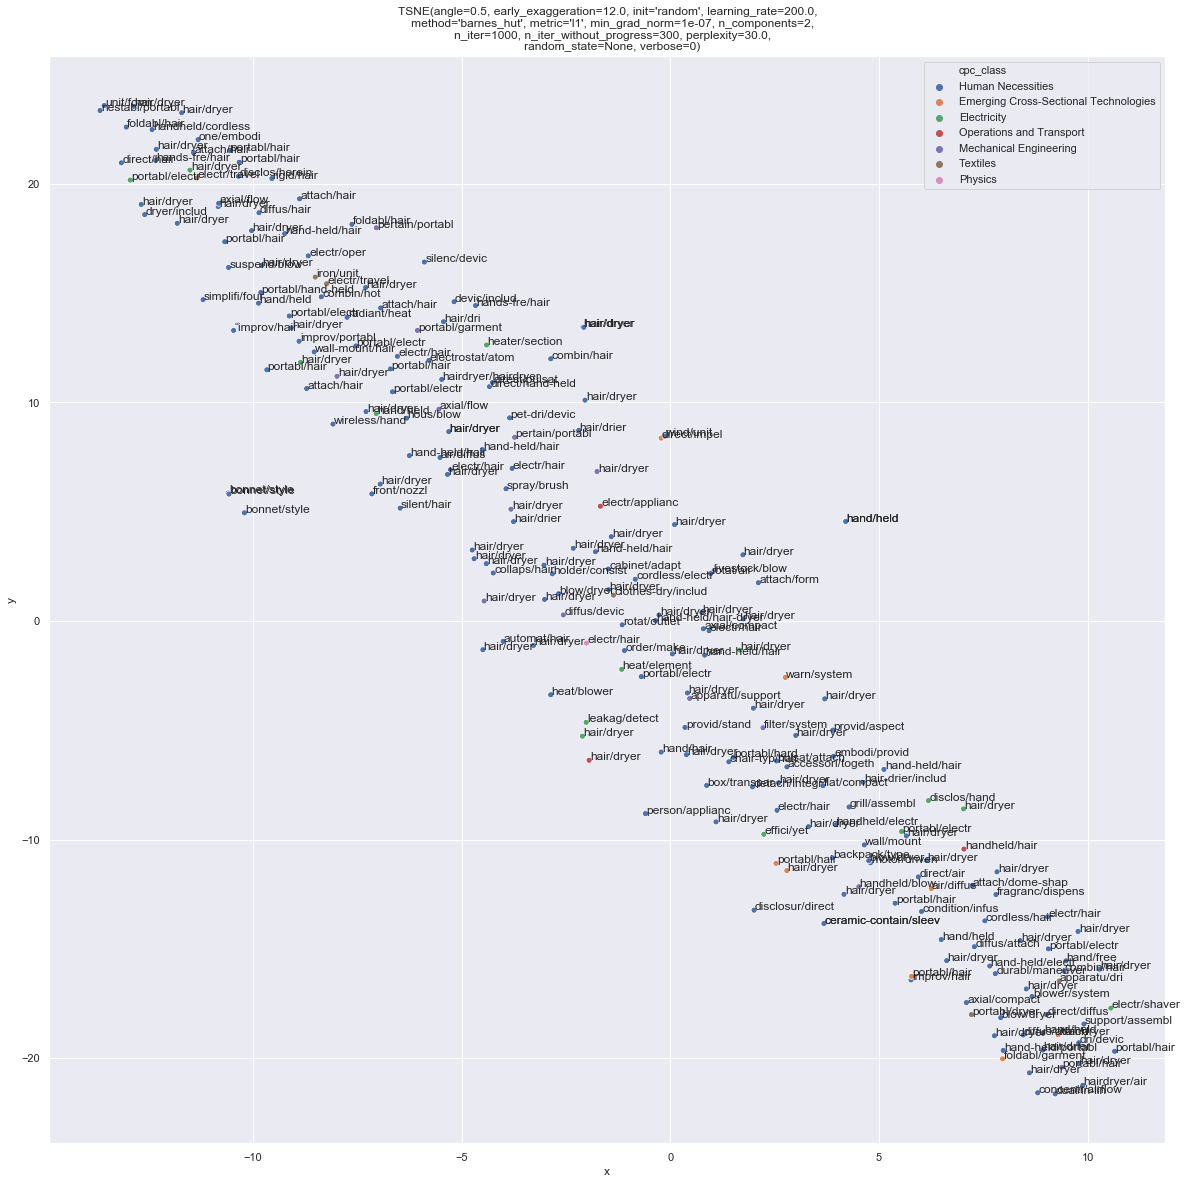

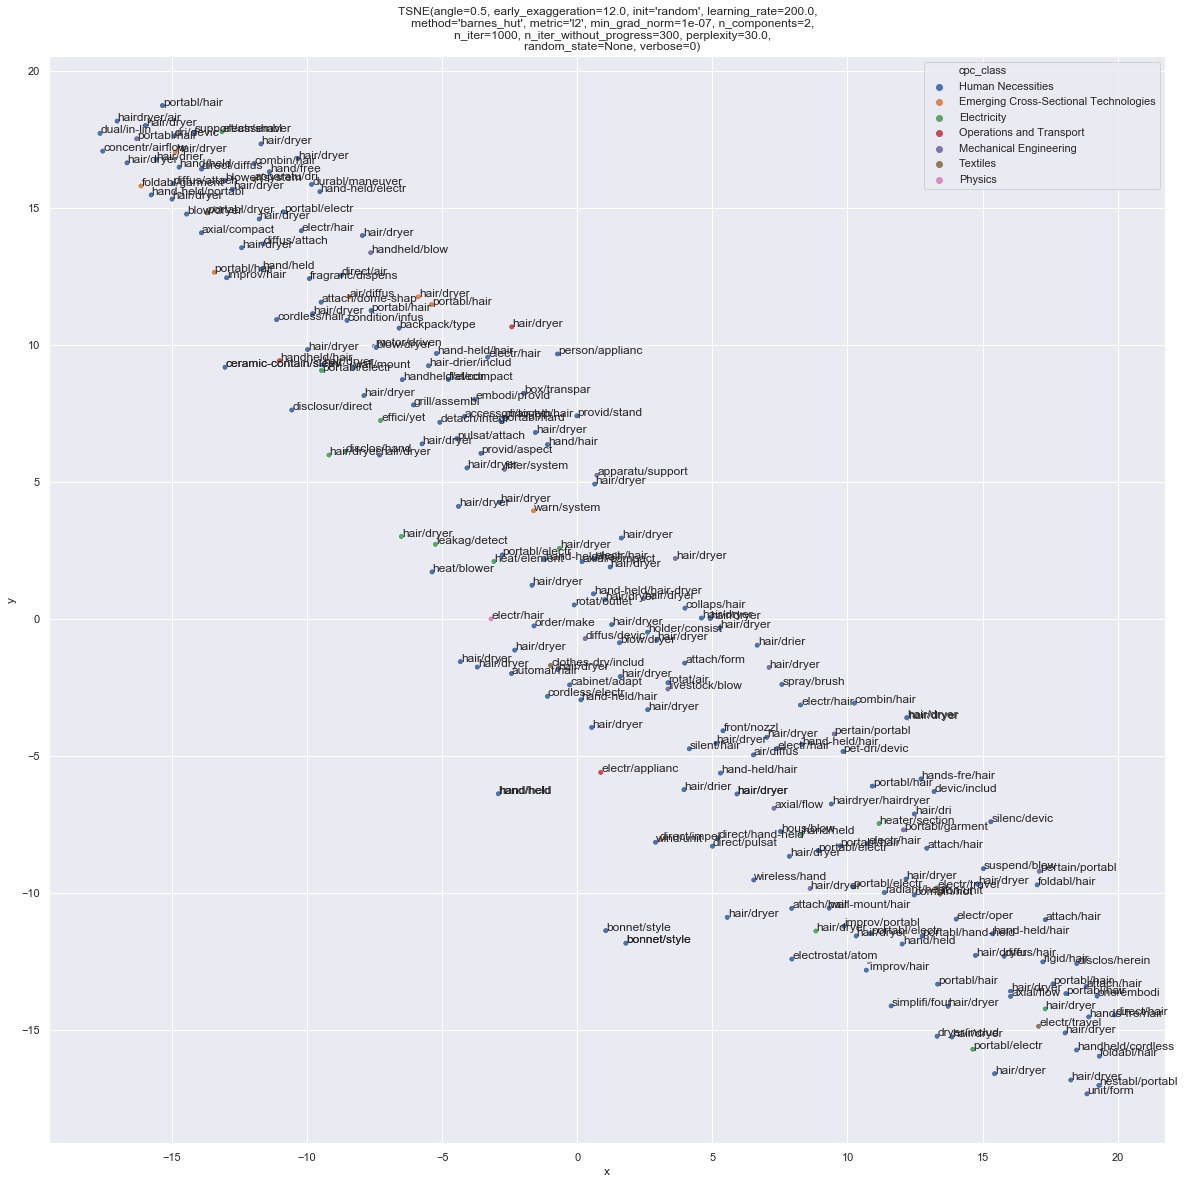

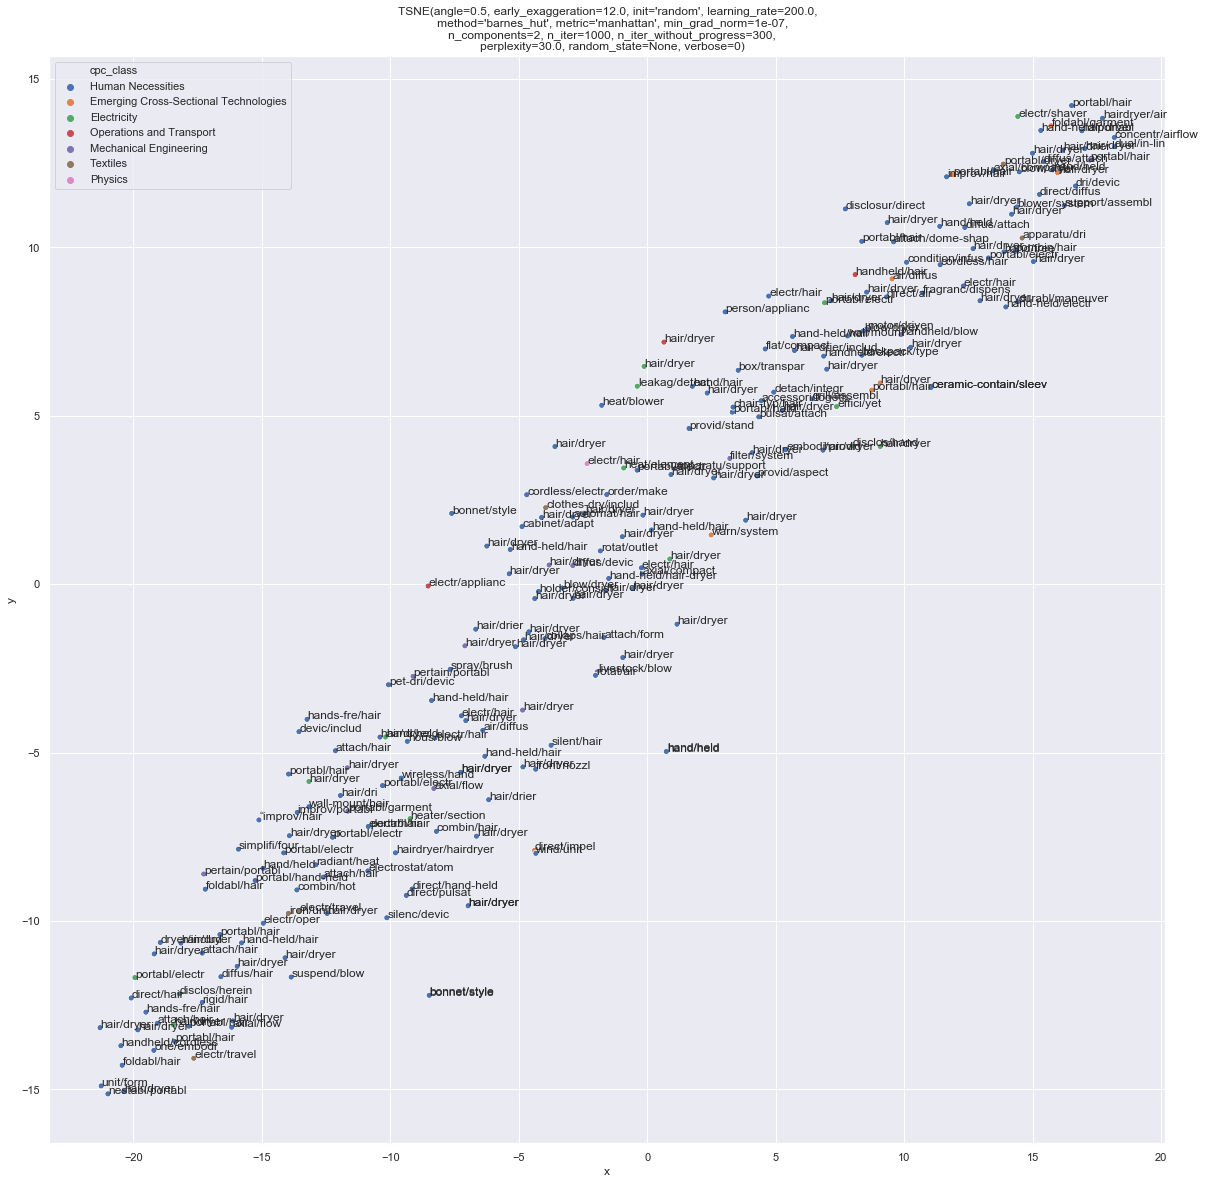

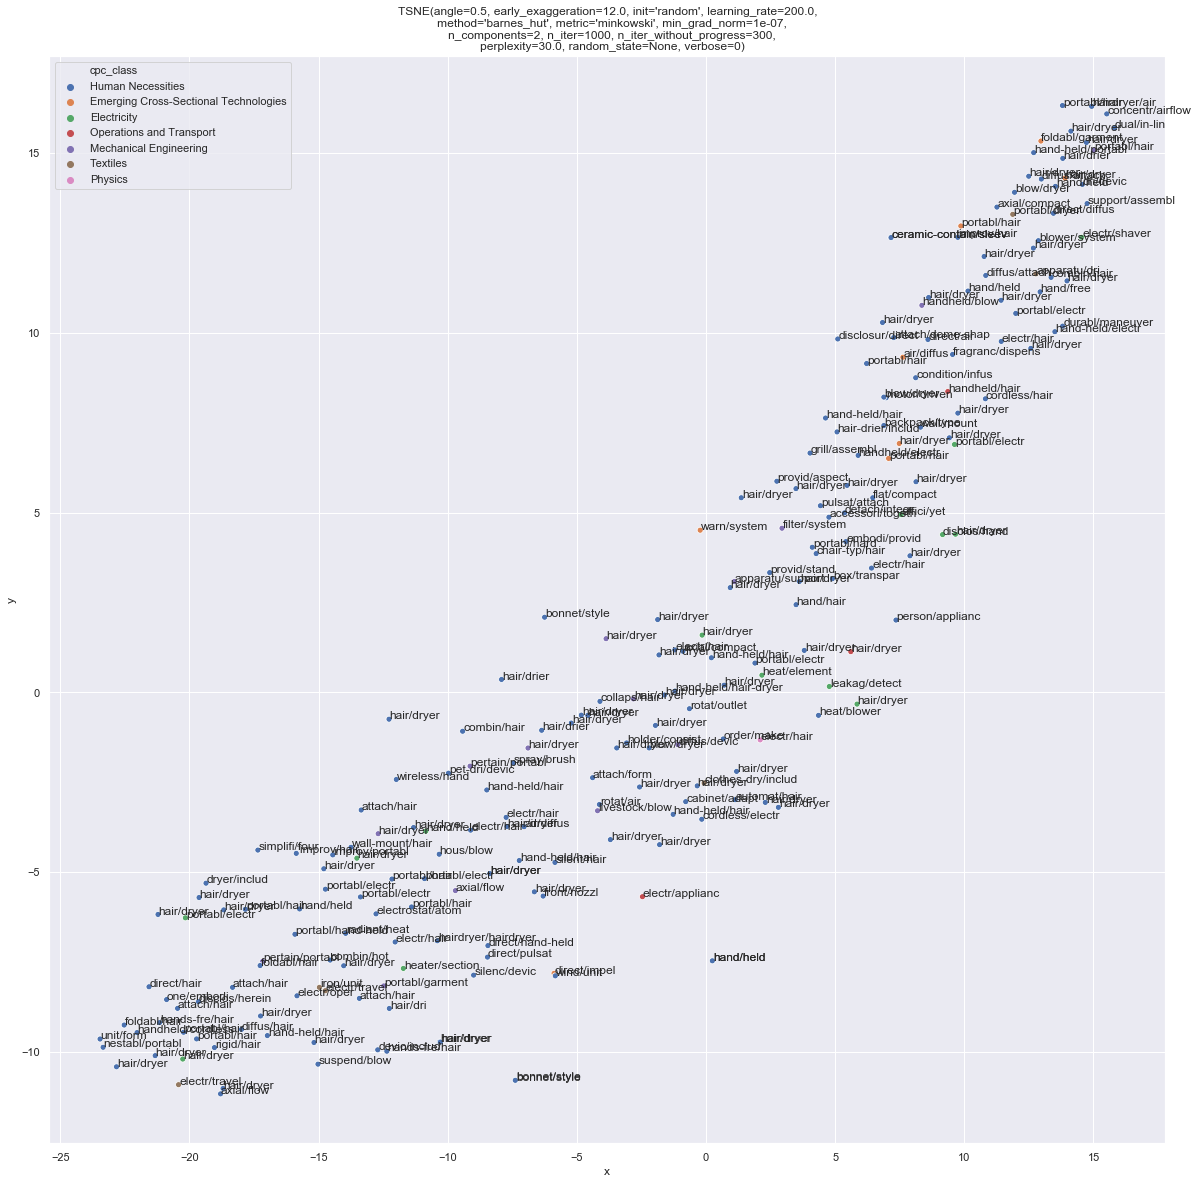

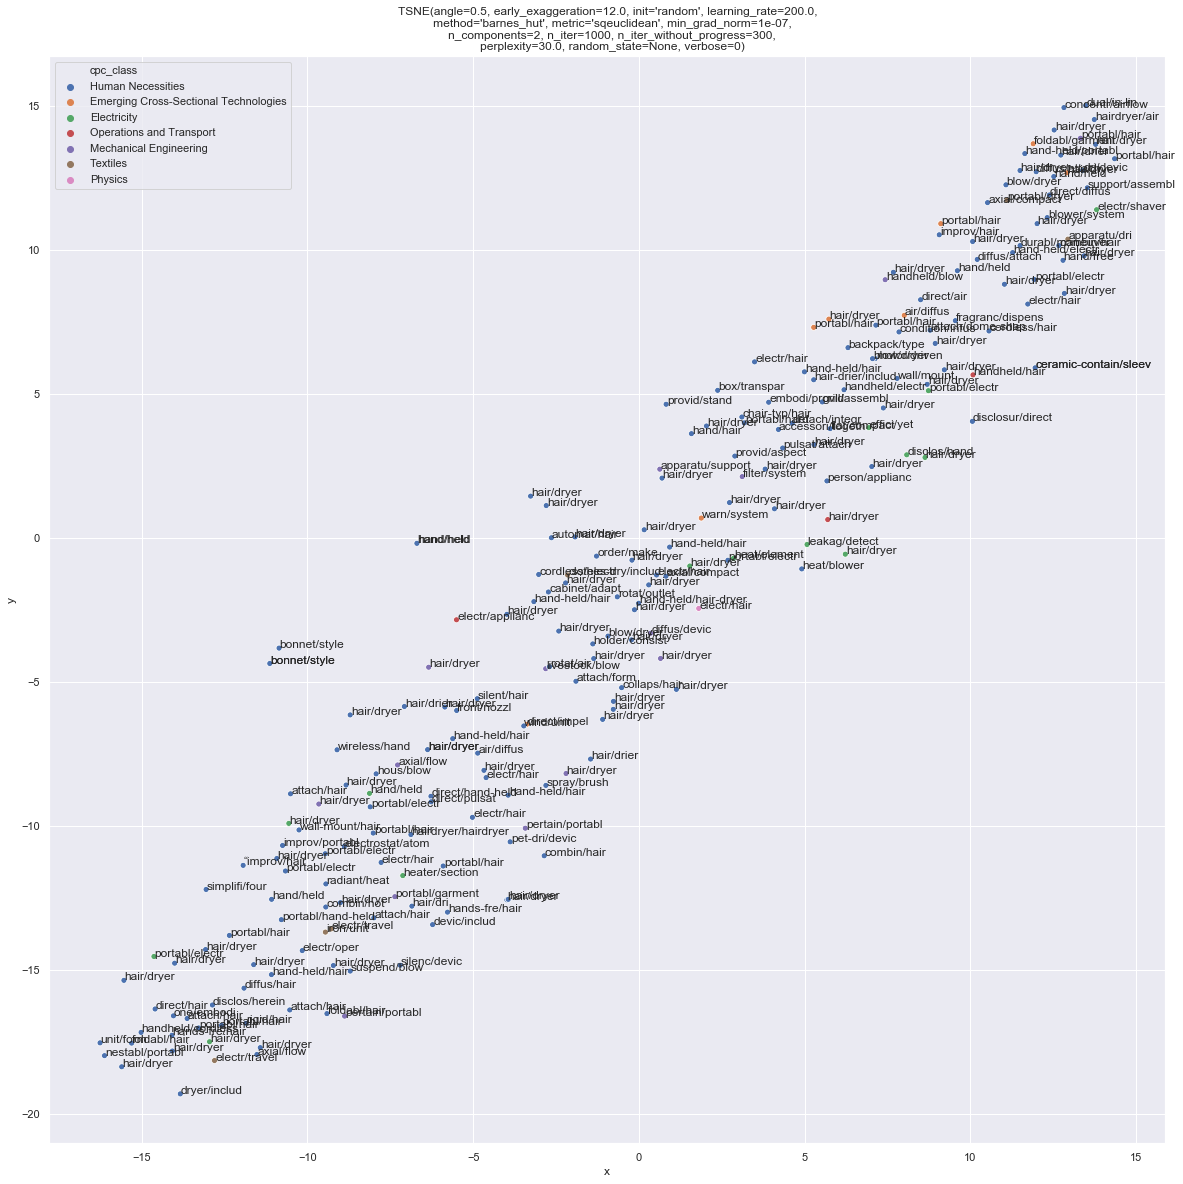

In [20]:
from sklearn.manifold import TSNE

for m in metrics:
    tsne = TSNE(metric=m)
    ev300 = EmbeddingVisualizer(tsne, average_word_seed, patents_seed)
    ev300.plot_embeddings(detailed=True, density=1, terms=2)